# Project work to analyze the effectiveness of advertising investments
***We have to find the reasons for the low ROI of the latest campaigns over the past few months.***

We have data about users acquired from May 1 to October 27, 2019:
- The server log with data on their visits,
- their purchases for this period,
- Advertising expenses log.

We have to answer following questions:
- Where do our users come from and what devices do they use
- how much does it cost to attract users from various advertising channels
- How much money each client brings
- when the costs of attracting a client pays off (break-even points)
- What factors interfere with customer aquisition and retention.

In [131]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def line():
    print('-----------------------------------------------------')
    return None

## import data from files and analyze their structure

In [132]:
# import data from files

visits =pd.read_csv('visits_info_short.csv') 
orders = pd.read_csv('orders_info_short.csv')  
costs = pd.read_csv('costs_info_short.csv') 

display(visits.head(2))
line()
display(visits.info())
line()

display(orders.head(2))
line()
display(orders.info())
line()

display(costs.head(2))
line()
display(costs.info())
line()

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

-----------------------------------------------------


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

-----------------------------------------------------


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

-----------------------------------------------------


**File with user visits**
- 309901 records, no passes, data on the beginning and end of the session in the format of the text, must be transferred to DateTime

**File with user orders**
- 40212 records, no passes, data about the time in the format of the text, must be transferred to DateTime

**File with advertising costs**
- 1800 records, no passes, data about time in the format of the text, must be transferred to Datetime

We also need to pay attention to the fact that in our data there are no types of user circulation (Events) and there is a wrong format of the name of the columns

### We will give data on the date in the desired format, correct the name of the columns and check the database for duplicates

We also select from data on time into separate columns data on the year, month, week, date and duration of the visit

In [133]:
# translate the names of the columns into a capital format without passes

# visits.columns = ['user_id','region','device','channel','session_start','session_end']
# orders.columns = ['user_id','event_dt','revenue']
# costs.columns = ['dt','channel','costs']

visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.strip().str.lower().str.replace(' ', '_')


# check for full duplicates
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

# Let's check for implicit duplicates
print(visits.duplicated(['user_id','session_start']).sum())
print(orders.duplicated(['user_id','event_dt']).sum())

# Data on visits: We transfer dates to the desired format and allocate a year, month, week and date to separate columns
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

# We determine the year, month, week and day of the beginning of the session and its duration in seconds
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week'] = visits['session_start'].dt.isocalendar().week
visits['session_date'] = visits['session_start'].dt.date
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds

# Data on activity: we transfer dates to the desired format and allocate a year, a month into separate columns
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['event_dt_year'] = orders['event_dt'].dt.year
orders['event_dt_month'] = orders['event_dt'].dt.month

# Data on advertising costs: We transfer dates to the desired format
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

print(visits.info())
line()

print(orders.info())
line()

print(costs.info())
line()

0
0
0
0
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               309901 non-null  int64         
 1   region                309901 non-null  object        
 2   device                309901 non-null  object        
 3   channel               309901 non-null  object        
 4   session_start         309901 non-null  datetime64[ns]
 5   session_end           309901 non-null  datetime64[ns]
 6   session_year          309901 non-null  int32         
 7   session_month         309901 non-null  int32         
 8   session_week          309901 non-null  UInt32        
 9   session_date          309901 non-null  object        
 10  session_duration_sec  309901 non-null  int32         
dtypes: UInt32(1), datetime64[ns](2), int32(3), int64(1), object(4)
memory usage: 21.6+ MB
None
----------------

There were no complete and implicit duplicates, columns were renamed, the dates are corrected

### functions for calculating and analysis of LTV, ROI, retention and conversion.

These are functions for calculating metric values:

- `get_profiles ()` - to create user profiles,
- `get_retenation ()` - for the calculation of RETENIONTION RATE,
- `get_Conversion ()` - to calculate the conversion,
- `get_ltv ()` - for calculating LTV.

As well as functions for building graphs:

- `Filter_Data ()` - to smooth out data,
- `PLOT_RETENTION ()` - to build a schedule RETENIONTION RATE,
- `Plot_Conversion ()` - to build a conversion schedule,
- `Plot_ltv_roi` - for visualization LTV and ROI.

In [134]:
# Function for creating user profiles

def get_profiles(sessions, orders, ad_costs):

# Find the parameters of the first visits
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

# for cohort analysis, we determine the date of the first visit
# and the first day of the month on which this visit happened
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

# Add a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#    # Add flags for all events from Event_Names - - - There are no types of events in our data, we do not use this block
#     for event in event_names:
#         if event in events['event_name'].unique():
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

# We count the number of unique users
# with the same source and date of attracting
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

# We combine expenses for advertising and the number of attracted users
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

# divide the advertising costs of the number of attracted users
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

# add the cost of attracting to the profiles
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

# The cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [135]:
# retention Function

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# Add Payer column to Dimension List
    dimensions = ['payer'] + dimensions

# Exclude users who have not "survived" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

# We collect "raw" data for the calculation of retention
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

# Function for grouping the table on the desired signs
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

# We get a retention table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

# We get a table of retention dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

# Return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [136]:

# function for calculating conversion

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# Exclude users who have not "survived" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

# Define the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

# Add purchases in profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

# calculate Lifemas for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

# We are grouped by COHORT, if there is nothing in Dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

# Function for grouping the table on the desired signs
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
# divide each "cell" in a line by the size of the cohort
# And we get Conversion Rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

# We get a conversion table
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

# for the table of conversion dynamics, we remove 'COHORT' from Dimensions
    if 'cohort' in dimensions: 
        dimensions = []

# We get a conversion dynamics table
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

# Return both tables and raw data
    return result_raw, result_grouped, result_in_time

In [137]:
# Function for calculating LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

# Exclude users who have not "survived" to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - dt.timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
# Add purchases in profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
# calculate the Lifem of the user for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
# We are grouped by COHORT, if there is nothing in Dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

# The function of the grouping on the desired signs
    def group_by_dimensions(df, dims, horizon_days):
# build a "triangular" revenue table
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
# Find the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
# Calculate the sizes of cohort
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
# combine the sizes of cohort and the revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
# We count LTV: Divide each "cell" in a line by the size of the cohort
        result = result.div(result['cohort_size'], axis=0)
# exclude all lifetema that exceed the horizon of analysis
        result = result[['cohort_size'] + list(range(horizon_days))]
# Restore the sizes of cohort
        result['cohort_size'] = cohort_sizes

# We collect a Datafrem with user data and CAC values, 
# adding parameters from Dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

# We count the average CAC in parameters from Dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

# We count ROI: Divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

# remove lines with endless ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

# Restore the sizes of cohort in the ROI table
        roi['cohort_size'] = cohort_sizes

# Add CAC to the ROI table
        roi['cac'] = cac['cac']

# In the final table we leave the sizes of cohort, CAC
# and ROI in lifetai not exceeding the horizon of analysis
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

# Return the LTV and ROI tables
        return result, roi

# We get the LTV and ROI tables
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for tables of dynamics, remove 'COHORT' from Dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # We get the dynamics tables LTV and ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # table LTV
        result_in_time,  # Dynamics table LTV
        roi_grouped,  # table ROI
        roi_in_time,  # Table of ROI Dynamics
    )

In [138]:
# Frame smoothing function

def filter_data(df, window):
    # for each column we use a sliding average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [139]:
# Function for visualization of retention

def plot_retention(retention, retention_history, horizon, window=7):

    # set the size of the grid for graphs
    plt.figure(figsize=(15, 10))

    # Eliminate the size of cohort and holding the first day
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # If in the indexes of the retention table only Payer,
    # Add the second sign - COHORT
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # in the table of graphs - two columns and two lines, four cells
    # In the first we build curves of deductions of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention paying users')

    # In the second cell, we build curves of non -paying deductions
    # Vertical axis - from graphics from the first cell
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention non -paying users')

    # In the third cell - the dynamics of retention of payers
    ax3 = plt.subplot(2, 2, 3)
    # We get the names of columns for a summary table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter data and build a graph
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of acquisition')
    plt.title(
        'The dynamics of retention paying users on {}'.format(
            horizon
        )
    )

    # the dynamics of retention of non -payers
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter data and build a graph
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Date of acquisition')
    plt.title(
        'The dynamics of retention non-paying users on {}'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [140]:
# Function for visualization of conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # set the size of the grid for graphs
    plt.figure(figsize=(15, 5))

    # Exclude the size of the cohort
    conversion = conversion.drop(columns=['cohort_size'])
    # In the Dynamics table we leave only the desired life
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # the first schedule - Curved conversions
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # second schedule - conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # columns of the summary table will become all the columns of the index, except for the date
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('The dynamics of user conversion on {}'.format(horizon))

    plt.tight_layout()
    plt.show()

In [141]:
#Visualization function LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set a graphic rush grid
    plt.figure(figsize=(20, 10))

    #From the LTV table, we exclude the size of the cohort
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # We will write down the cost of attracting in a separate frame
    cac_history = roi_history[['cac']]

    # From the ROI table, we exclude the sizes of cohort and CAC
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # In the ROI dynamics table, we leave only the desired lifetime
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # The first schedule is LTV curves
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # The second schedule is LTV dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # all columns of the index, except for the date
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Date of acquisition')
    plt.title('Dynamics LTV users on {}'.format(horizon))

    # The third schedule is CAC dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # all columns of the index, except for the date
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Date of aquisition')
    plt.title('Dynamics of the cost of acquisition users')

    # Fourth schedule - ROI curves
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пschedule - dynamics ROI
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # all columns of the index, except for the date
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='УThe payback level')
    plt.xlabel('Date of acquisition')
    plt.title('The dynamics of ROI users on {}'.format(horizon))

    plt.tight_layout()
    plt.show()

## Research Analysis of Data

### make user profiles

In [142]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt    month  payer  acquisition_cost  
0  2019-05-07  2019-05   True          1.088172  
1  2019-07-09  2019-07  False          1.107237  
2  2019-10-01  2019-10  False          0.000000  
3  2019-08-22  2019-08  False          0.988235  
4  2019-10-02  2019-10  False          0.230769

### Let's look at the data distribution visually

Median costs for acquisition (including users who came without advertising): 0.25


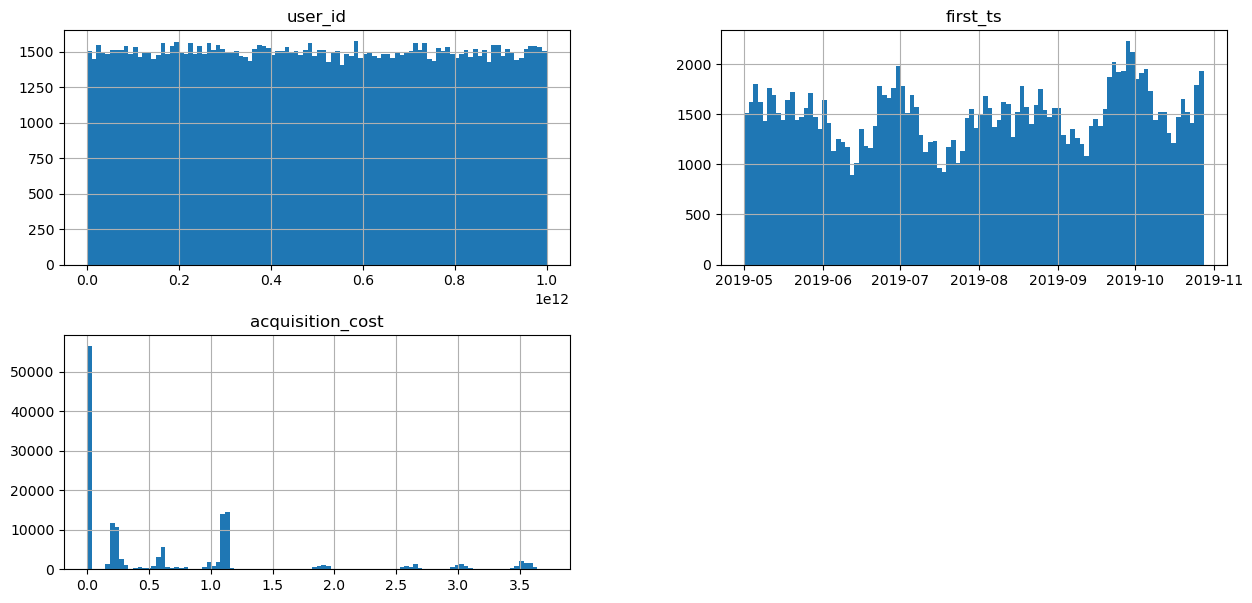

In [143]:
profiles.hist(bins=100, figsize=(15,7));

print('Median costs for acquisition (including users who came without advertising): {:.2f}'.format(profiles['acquisition_cost'].median()))

**What initial observations can be made:**
- The dynamics of the number of attractive users (first_ts) shows seasonal fluctuations - in the middle of each month we observe the failure, which can be associated with the dynamics of advertising campaigns
- The number of users who came in June-July is significantly less than May indicators.In August-September, the number returned to May values, but in October it fell again
- the median value of the cost of attracting, including "free" users - 0.25
- Most customers (about 60,000) came from the Organic channel, i.e.Without the cost of their attraction
- The next large peak in the cost of attracting - about 1
- there are a fairly large number of customers, the cost of attracting which is 10 or more times higher than the median

Let's look at the distribution of costs for attracting more closely: exclude from the analysis of users with 0 the cost of attracting



Median costs for acquisition (for advertising): 1.08


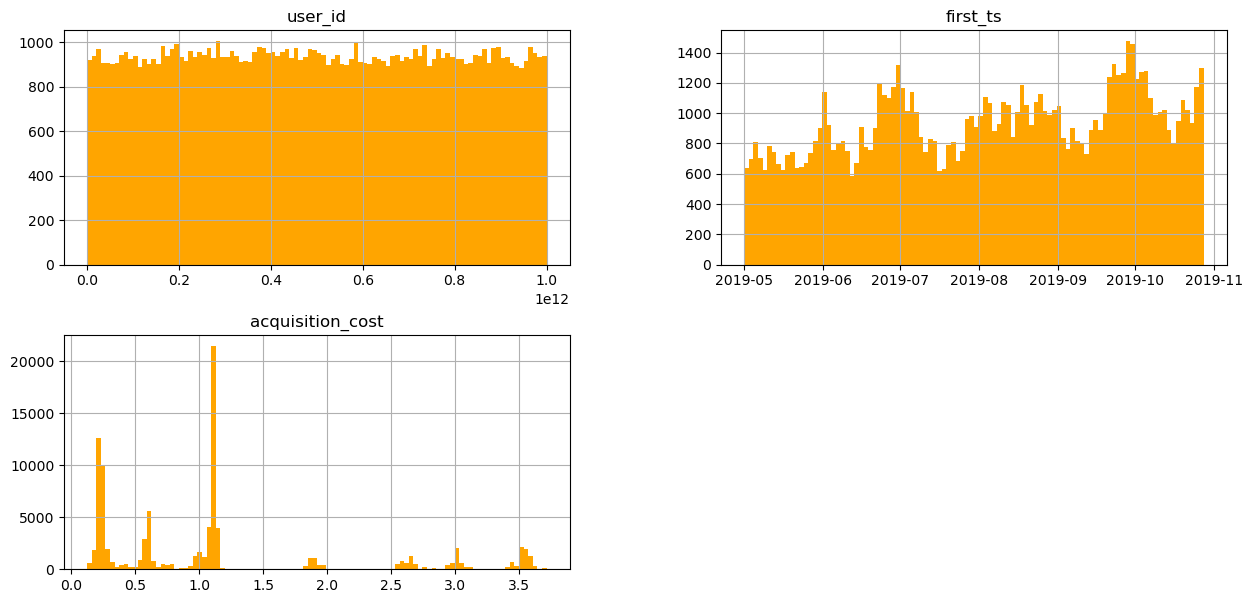

In [144]:
print('Median costs for acquisition (for advertising): {:.2f}'.format(profiles.loc[profiles['channel']!='organic', 'acquisition_cost'].median()))

profiles.query('acquisition_cost>0').hist(bins=100, figsize=(15,7), color='orange');


- Seasonal fluctuations in attracting users are also present - in the middle of each month we observe failures
- most of the cost of attracting is in the limit 0.25 - 1.25


### We will see if there are differences in seasonal fluctuations in attracting organic and paid users

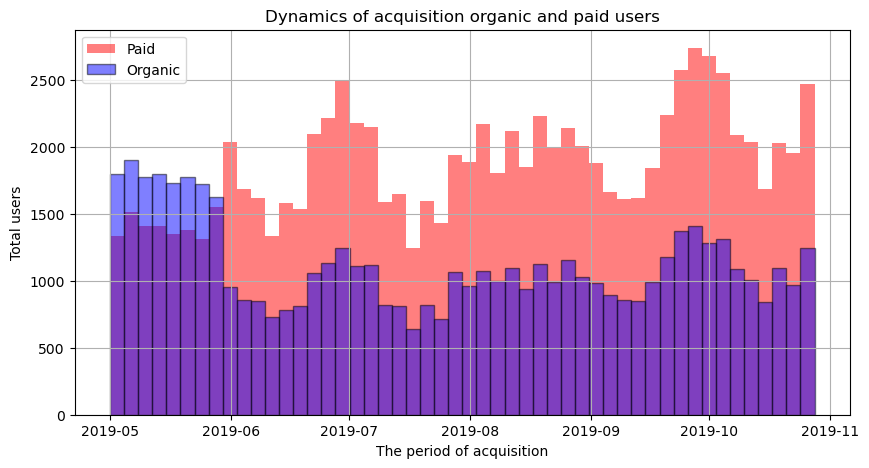

In [145]:
profiles_organic = profiles.query('channel == "organic"')
profiles_ad = profiles.query('channel != "organic"')

plt.figure(figsize=(10, 5))

profiles_ad['first_ts'].hist(bins=50, color='red', alpha=0.5, label='Paid')
profiles_organic['first_ts'].hist(bins=50, color='blue', alpha=0.5, edgecolor='black', label='Organic')

# Set up the axis and add legendsу
plt.ylabel('Total users')
plt.xlabel('The period of acquisition')
plt.legend(loc='upper left')

# Add the title
plt.title('Dynamics of acquisition organic and paid users')

plt.show()

- seasonal fluctuations in attracting organic users repeat the involvement of paid
- A curious moment: in May, attracting organic users was higher than paid, after which, from the beginning of June it fell sharply.This may be due to the beginning of an aggressive advertising campaign or the output of advertising in new marketsing in new markets

### We will define the minimum and maximum dates of attracting users

In [146]:
print('The minimum date of acquisition: {}'.format(profiles['first_ts'].min().date()))
print('The maximum date of acquisition: {}'.format(profiles['first_ts'].max().date()))

The minimum date of acquisition: 2019-05-01
The maximum date of acquisition: 2019-10-27


### Find out from which countries users come to the application and which country is most paying users

payer          non_payer  payer  country_total  ratio_%
region                                                 
France             16787    663          17450     3.80
Germany            14365    616          14981     4.11
UK                 16875    700          17575     3.98
United States      93100   6902         100002     6.90


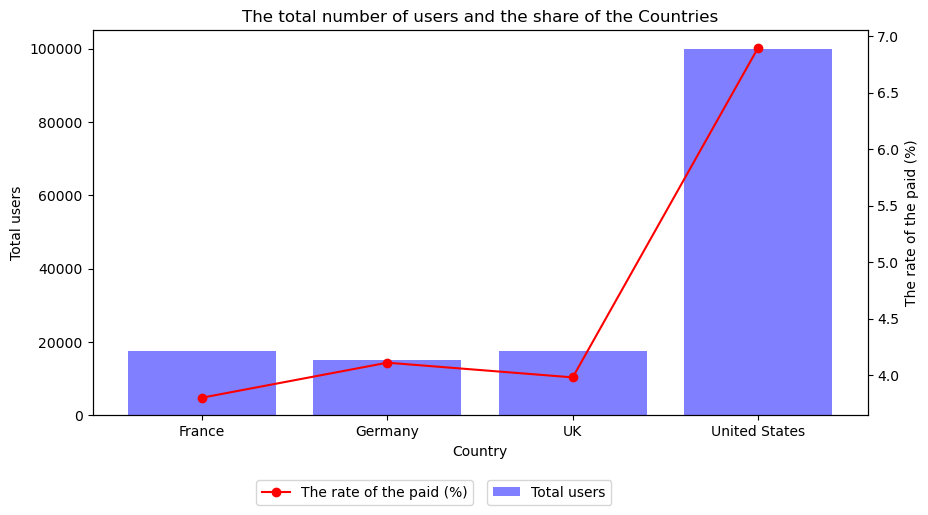

In [147]:
payer_by_country = pd.pivot_table(profiles, index='region', columns='payer', values='user_id', aggfunc='count')

# Rename the columns
payer_by_country = payer_by_country.rename(columns={False: 'non_payer', True: 'payer'})

# Add a column with a ratio of users who pay and do not pay
payer_by_country['country_total'] = payer_by_country.sum(axis=1)
payer_by_country['ratio_%'] = round(payer_by_country['payer'] / payer_by_country['country_total'] * 100, 2)

print(payer_by_country)

# Build a schedule for clarity
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(payer_by_country.index, payer_by_country['country_total'], color='b', alpha=0.5, label='Total users');

# Create a second axis for a share of paying users
ax2 = ax1.twinx()
ax2.plot(payer_by_country.index, payer_by_country['ratio_%'], color='r', marker='o', label='The rate of the paid (%)');

# Set up the axis and add the legend
ax1.set_ylabel('Total users')
ax2.set_ylabel('The rate of the paid (%)')
ax1.set_xlabel('Country')
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15))

# Add the title
plt.title('The total number of users and the share of the Countries')

# We display the graph
plt.show()

- The largest number of users in the USA - 100 thousand against 15-18 thousand in each of the other countries
- In the USA, the highest ratio of paying usels to their total quantity - **6.9%**
- In other countries, the share of paying users at the level of **4%**, the least paying users in France - **3.8%**

### Let's see what percentage of organic users in each of the countries and how I distribute advertising channels

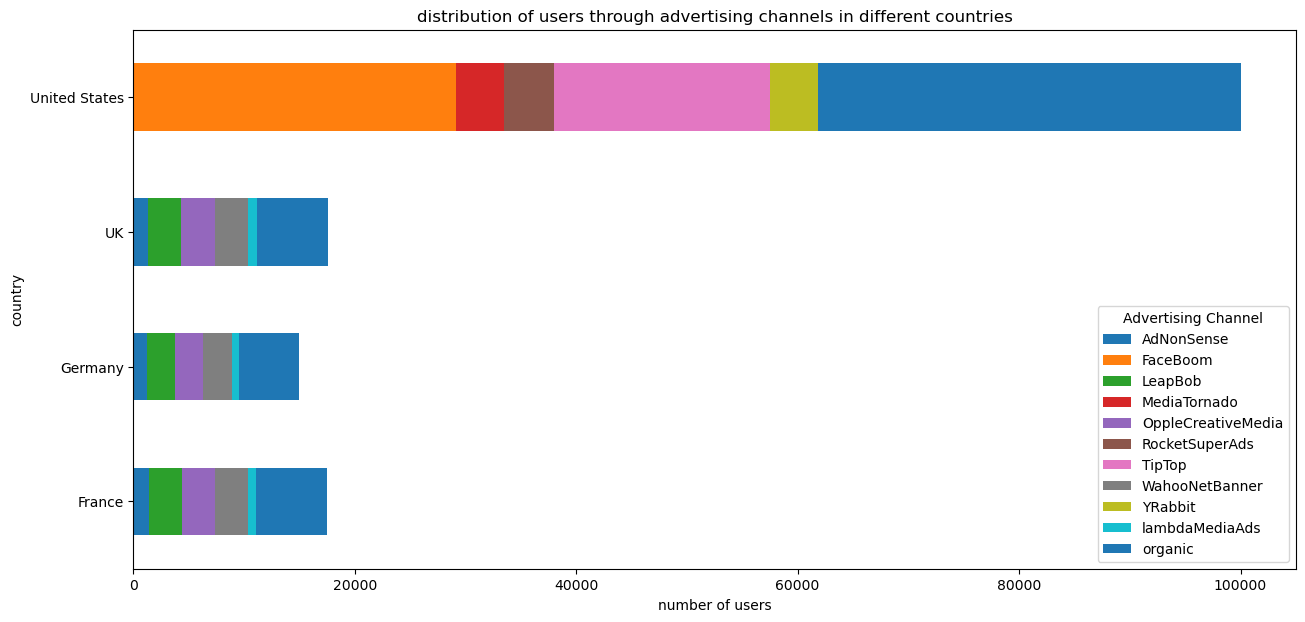

channel        AdNonSense  FaceBoom  LeapBob  MediaTornado  \
region                                                       
France             1366.0       0.0   2988.0           0.0   
Germany            1219.0       0.0   2519.0           0.0   
UK                 1295.0       0.0   3046.0           0.0   
United States         0.0   29144.0      0.0        4364.0   

channel        OppleCreativeMedia  RocketSuperAds   TipTop  WahooNetBanner  \
region                                                                       
France                     2991.0             0.0      0.0          2971.0   
Germany                    2562.0             0.0      0.0          2579.0   
UK                         3052.0             0.0      0.0          3003.0   
United States                 0.0          4448.0  19561.0             0.0   

channel        YRabbit  lambdaMediaAds  organic     total  organic_ratio  
region                                                                    
France             0.0           742.0   6392.0   17450.0          36.63  
Germany            0.0           649.0   5453.0   14981.0          36.40  
UK                 0.0           758.0   6421.0   17575.0          36.53  
United States   4312.0             0.0  38173.0  100002.0          38.17

In [148]:
organic_by_country = pd.pivot_table(profiles, index='region', columns='channel', values='user_id', aggfunc='count').fillna(0)

# Summarize the number of users for each channel
organic_by_country['total'] = organic_by_country_data.sum(axis=1)

# Calculate the share of users who came from an organic source
organic_by_country['organic_ratio'] = round((organic_by_country_data['organic'] / organic_by_country['total']) * 100, 2)

organic_by_country_data.plot(kind='barh', stacked=True, figsize=(15, 7))

# Setting title and signing axes
plt.title ('distribution of users through advertising channels in different countries')
plt.xlabel ('number of users')
plt.ylabel ('country')

# The display of the legend
plt.legend(title='Advertising Channel')

# The chart display
plt.show()

display(organic_by_country)

- The proportion of organic users is approximately the same for all countries - **36-38%**, i.e. There are no anomalies
- The graph shows that the split of advertising channels for the United States differs from other countries: in the USA they use mainly **Tiptop & Faceboom**, while in other countries do not make ads on those channels, which is strange.

### We will find out which devices do customers use and which devices prefer paying users

payer    non_payer  payer  device_total  ratio_%
device                                          
Android      32982   2050         35032     5.85
Mac          28130   1912         30042     6.36
PC           28918   1537         30455     5.05
iPhone       51097   3382         54479     6.21


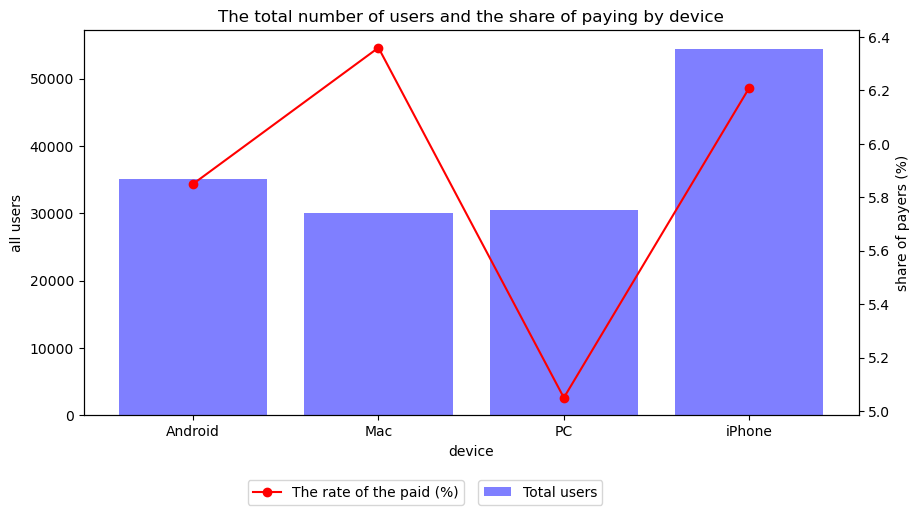

In [149]:
payer_by_device = pd.pivot_table(profiles, index='device', columns='payer', values='user_id', aggfunc='count')

# Rename the columns
payer_by_device = payer_by_device.rename(columns={False: 'non_payer', True: 'payer'})

# Add a column with a ratio of users who pay and do not pay
payer_by_device['device_total'] = payer_by_device.sum(axis=1)
payer_by_device['ratio_%'] = round(payer_by_device['payer'] / payer_by_device['device_total'] * 100, 2)

print(payer_by_device)

# Build a schedule for clarity
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.bar(payer_by_device.index, payer_by_device['device_total'], color='b', alpha=0.5, label='Total users');

# Create a second axis for a share of paying users
ax2 = ax1.twinx()
ax2.plot(payer_by_device.index, payer_by_device['ratio_%'], color='r', marker='o', label='The rate of the paid (%)');

# Set up the axis and add the legend
ax1.set_ylabel ('all users')
ax2.set_ylabel ('share of payers (%)')
ax1.set_xlabel ('device')
ax1.legend(loc = 'upper left', bbox_to_anchor = (0.5, -0.15))
ax2.legend(loc = 'upper right', bbox_to_anchor = (0.5, -0.15))

# Add the title
plt.title('The total number of users and the share of paying by device')

plt.show()

- In the first place in quantity - iPhone users, 54.5 thousand, of which **6.21%** - paying
- In second place in quantity - android users, 35 thousand, of which **5.85%** - paying
- MAC and PC are approximately equal - 30 thousand, but paying users Mac has -  **6.36%**, against **5.05%** on PC 

### We will study the advertising sources of attraction and determine the channels from which the most paying users came

-----------------------------------------------------
Avg percentage of payers: 5.92


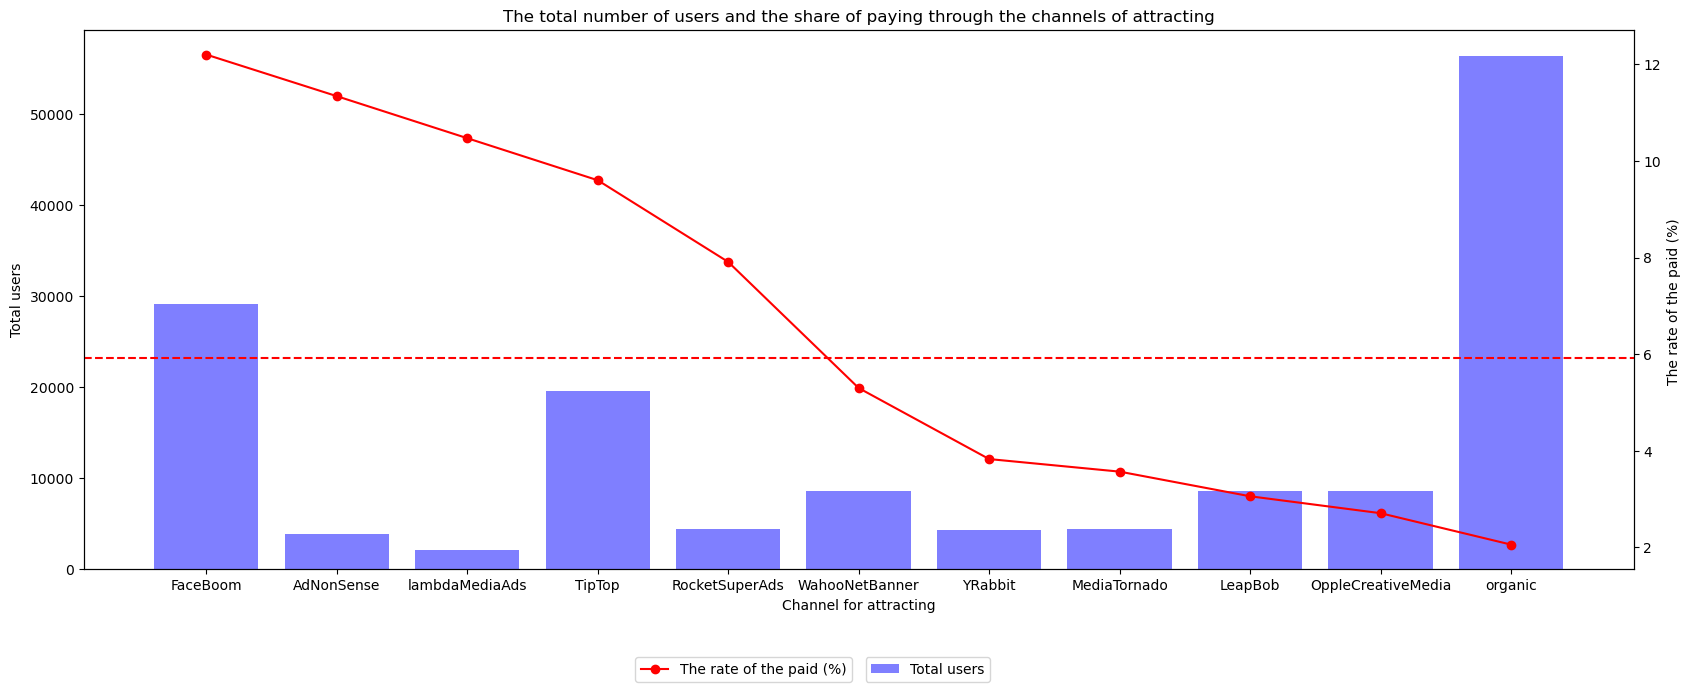

payer               non_payer  payer  channel_total  ratio_%
channel                                                     
FaceBoom                25587   3557          29144    12.20
AdNonSense               3440    440           3880    11.34
lambdaMediaAds           1924    225           2149    10.47
TipTop                  17683   1878          19561     9.60
RocketSuperAds           4096    352           4448     7.91
WahooNetBanner           8100    453           8553     5.30
YRabbit                  4147    165           4312     3.83
MediaTornado             4208    156           4364     3.57
LeapBob                  8291    262           8553     3.06
OppleCreativeMedia       8372    233           8605     2.71
organic                 55279   1160          56439     2.06

In [150]:
payer_by_channel = pd.pivot_table(profiles, index='channel', columns='payer', values='user_id', aggfunc='count')

# Rename the columns
payer_by_channel = payer_by_channel.rename(columns={False: 'non_payer', True: 'payer'})

# Add a column with a ratio of users who pay and do not pay
payer_by_channel['channel_total'] = payer_by_channel.sum(axis=1)
payer_by_channel = payer_by_channel.sort_values(by='channel_total', ascending=False)
payer_by_channel['ratio_%'] = round(payer_by_channel['payer'] / payer_by_channel['channel_total'] * 100, 2)
payer_by_channel.sort_values(by='ratio_%', ascending=False, inplace=True)

line()
print('Avg percentage of payers: {:.2f}'.format(payer_by_channel['payer'].sum() / payer_by_channel['channel_total'].sum()* 100))


# Build a chart for clarity
fig, ax1 = plt.subplots(figsize=(20, 7))

ax1.bar(payer_by_channel.index, payer_by_channel['channel_total'], color='b', alpha=0.5, label='Total users');

# Create a second axis for a share of paying users
ax2 = ax1.twinx()
ax2.plot(payer_by_channel.index, payer_by_channel['ratio_%'], color='r', marker='o', label='The rate of the paid (%)');

# Set up the axis and add the legend
ax1.set_ylabel('Total users')
ax2.set_ylabel('The rate of the paid (%) ')
ax1.set_xlabel('Channel for attracting')
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, -0.15))
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, -0.15))

# Adding a red dashed line at the level of the average share of payers (5.92%)
ax2.axhline(y=5.92, color='red', linestyle='--')

# Add the title
plt.title('The total number of users and the share of paying through the channels of attracting')

plt.show()

display(payer_by_channel)

- The average percentage of all payers among all users / all channels - *5.92%**
- The most users come without advertising - the Organic channel, 56 thousand, but at the same time, the share of paying among them is the lowest: **2.06%**
- In second place is the Faceboom channel, from there almost 30 thousand users came.And the share of payers of them is the highest among all channels - **12.2%**
- Further, the quantity is TIPTOP with 20 thousand users.The share of the payers is also high - **9.6%**
- The rest of the channels show much more modest results both in the number of attracted users (2-9 thousand) and the percentage of payers (less **4%** for OppleCreativeMedia, LEAPBOB, MEDIATORNADO, YIRABIBIT)
- Among the small in the number of attracted customers, Adnonsense and Lambdamediaads with a large share of payers stand out - more than **10%**.  

### Let's calculate the total amount of marketing costs and its distribution by advertising sources

total amount of marketing costs: 105497
-------------------------------------


channel  total_costs  percent_from_total  revenue_by_user  \
8              YRabbit       944.22            0.895018          6201.43   
5       RocketSuperAds      1833.00            1.737485         11598.32   
3         MediaTornado       954.48            0.904744          5752.32   
9       lambdaMediaAds      1557.60            1.476436          8941.70   
2              LeapBob      1797.60            1.703930          9560.13   
4   OppleCreativeMedia      2151.25            2.039152          8365.53   
7       WahooNetBanner      5151.00            4.882589         20006.63   
6               TipTop     54751.30           51.898295         69574.76   
0           AdNonSense      3911.25            3.707441          3697.17   
1             FaceBoom     32445.60           30.754910         25637.66   
10             organic         0.00            0.000000         46627.23   

     ratio  
8   656.78  
5   632.75  
3   602.67  
9   574.07  
2   531.83  
4   388.87  
7   388.40  
6   127.07  
0    94.53  
1    79.02  
10    0.00

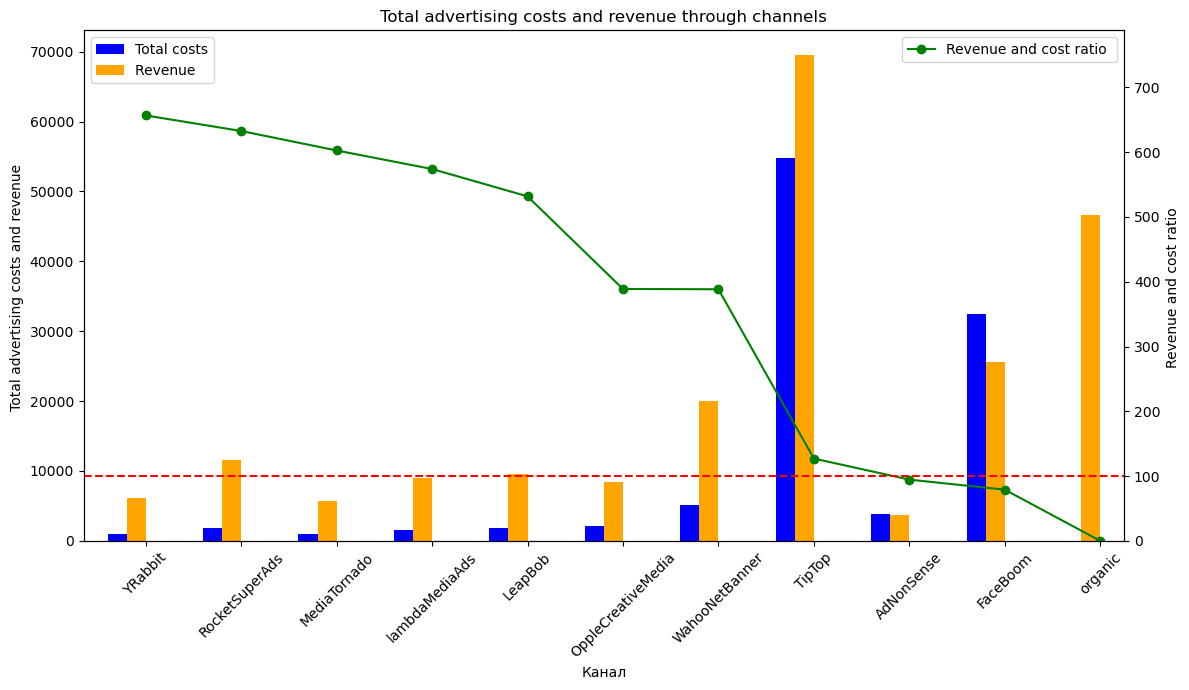

In [151]:

total_ad_cost_by_channel = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)

# We calculate the total costs
total_costs = total_ad_cost_by_channel.sum()

print ('total amount of marketing costs:', round (total_costs))
print('-------------------------------------')

# Calculate the percentage of the total amount for each channel
percent_from_total = total_ad_cost_by_channel / total_costs * 100

# Create a new Dataframe with results
ad_costs = pd.DataFrame({
    'channel': total_ad_cost_by_channel.index,
    'total_costs': total_ad_cost_by_channel.values,
    'percent_from_total': percent_from_total.values
})

# We calculate the ratio of the total advertising costs for the channel and revenue from users who came from these channels
# First, calculate the total Revenue for each user
revenue_by_user_data = orders.groupby('user_id').agg({'revenue':'sum'})
revenue_by_user = pd.DataFrame(revenue_by_user_data)

# Mergers of Revenue data by user_id with user profiles data
profiles = pd.merge(profiles, revenue_by_user, on='user_id', how='left').fillna(0)
profiles.rename(columns={'revenue': 'revenue_by_user'}, inplace=True)

# Now we calculate Revenue in relation to the channels where the users came from
revenue_by_channel_data = profiles.groupby('channel').agg({'revenue_by_user':'sum'})
revenue_by_channel = pd.DataFrame(revenue_by_channel_data)

channel_revenue_vs_costs = pd.merge(ad_costs, revenue_by_channel, on='channel', how='right')
channel_revenue_vs_costs['ratio'] = round(channel_revenue_vs_costs['revenue_by_user'] / channel_revenue_vs_costs['total_costs'] * 100, 2)
channel_revenue_vs_costs = channel_revenue_vs_costs.sort_values(by='ratio', ascending=False).fillna(0)
display(channel_revenue_vs_costs)

# add data visualization

# Creating a figure and axes
fig, ax1 = plt.subplots(figsize=(12, 7))

channel_revenue_vs_costs[['total_costs', 'revenue_by_user']].plot(kind='bar', ax=ax1, width=0.4, position=1, color=['blue', 'orange'], legend=False)

# Setting the axes
ax1.set_ylabel('Total advertising costs and revenue ')
ax1.set_xlabel('Канал')
ax1.set_xticklabels(channel_revenue_vs_costs['channel'], rotation=45)
ax1.set_title('Total advertising costs and revenue through channels')

# Creating the second axis Y for graphics with Ratio
ax2 = ax1.twinx()

ax2.plot(channel_revenue_vs_costs['channel'], channel_revenue_vs_costs['ratio'], marker='o', color='green')
# Setting the second axis Y
ax2.set_ylabel('Revenue and cost ratio ')
ax2.set_ylim(0, max(channel_revenue_vs_costs['ratio']) * 1.2)  # Installation of the limit for the second axis Y
ax1.legend(['Total costs', 'Revenue '], loc='upper left')
ax2.legend(['Revenue and cost ratio '], loc='upper right')

# Adding a red dashed line at the level of 100% ratio
ax2.axhline(y=100, color='red', linestyle='--')

plt.tight_layout()
plt.show()


- on the graph of the red bullet line, the level of ratio of costs and revenue = 100%, i.e.when costs = revenue
- In the first place in terms of costs and revenue - the TipTop channel, although its ratio is not so impressive - **127%**
- Place number 2 in revenue is customers who came themselves.Advertising costs = 0
- third place in revenue and Faceboom, but here is the cost ratio - **79%**, i.e.Here we spend more on advertising than we earn.
- The remaining channels, although they show more modest revenue results, have a much higher revenue/costs - **400% and higher**.
- In unprofitable and lagging - Adnonsense channel.    

### We will build graphs with visualization of the dynamics of changes in time expenses for weeks and months for each source

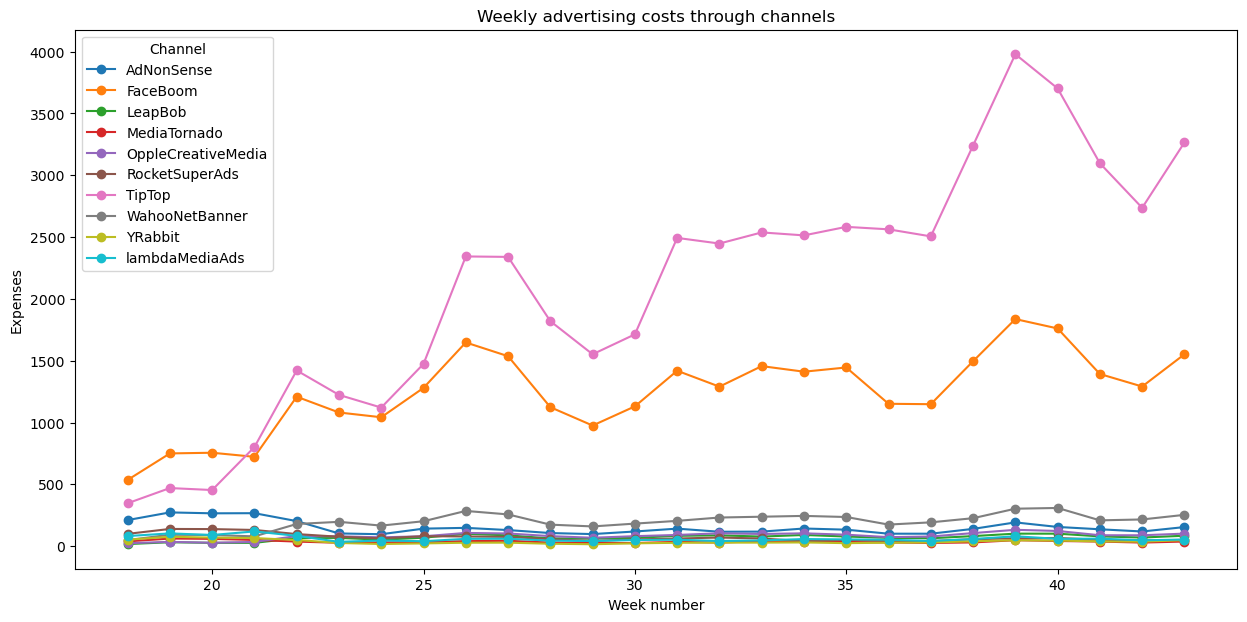

In [152]:

monthly_ad_cost_by_channel = pd.pivot_table(costs, index='channel', columns='dt_month', values='costs', aggfunc='sum').reset_index()
weekly_ad_cost_by_channel = pd.pivot_table(costs, index='channel', columns='dt_week', values='costs', aggfunc='sum').reset_index()

# Creating a graph for each channel for weekly advertising costs
fig, ax = plt.subplots(figsize=(15, 7))

for index, row in weekly_ad_cost_by_channel.iterrows():
    ax.plot(weekly_ad_cost_by_channel.columns[1:], row[1:], marker='o', label=row['channel'])

# Settings of the graphics
plt.title('Weekly advertising costs through channels')
plt.xlabel('Week number')
plt.ylabel('Expenses')

# The display of the legend
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(0, 1))

plt.show()


- As can be seen from the schedule, seasonal fluctuations in the influx of users correspond to the dynamics of advertising costs
- At the beginning of the period (the first 3 weeks), advertising costs were stable, after which they went up sharply, which may be due to the task of attracting new users
- Starting from the 4th week, TipTop & Faceboom, while the rest are at the same level, are selected as key platforms for advertising.
- From the 4th week, advertising costs on TipTop are growing the fastest

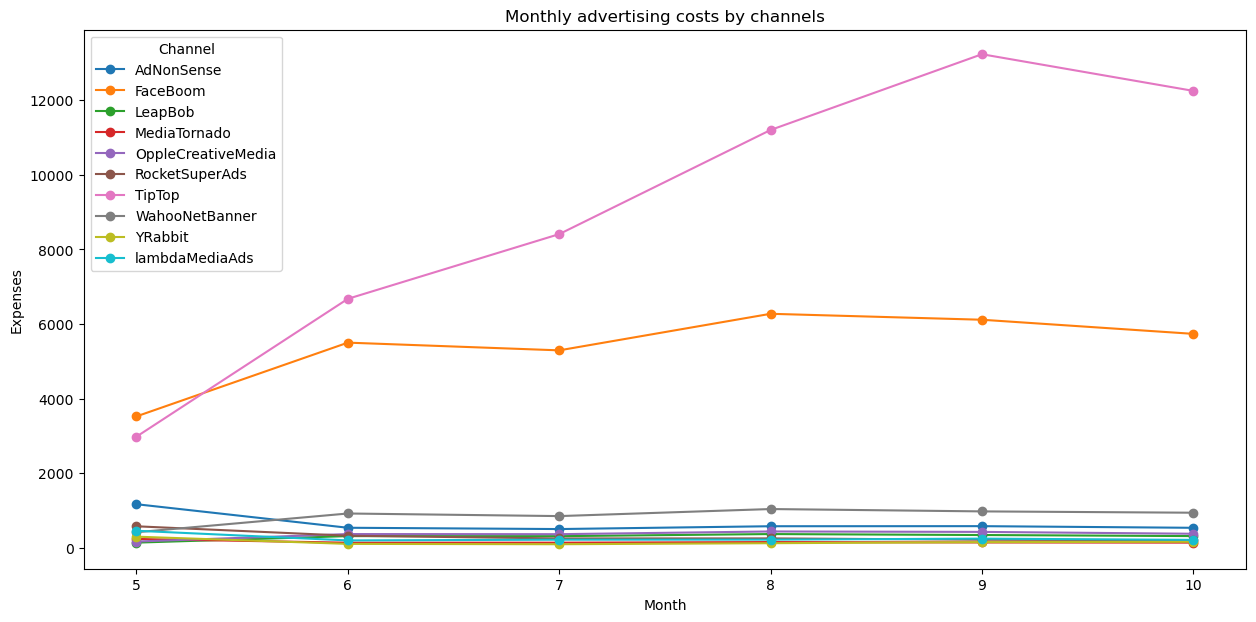

In [153]:
# Creating a graph for each channel for monthly advertising costs
fig, ax = plt.subplots(figsize=(15, 7))

for index, row in monthly_ad_cost_by_channel.iterrows():
    ax.plot(monthly_ad_cost_by_channel.columns[1:], row[1:], marker='o', label=row['channel'])

# Settings of the graphics
plt.title('Monthly advertising costs by channels')
plt.xlabel('Month')
plt.ylabel('Expenses')

# The display of the legend
plt.legend(title='Channel', loc='upper left', bbox_to_anchor=(0, 1))

plt.show()

- on the monthly dynamics of costs, there is even more obvious emphasis on advertising in TIPTOP

### We will find out how much on average it was worth attracting one user (CAC) from each source

channel  user_count  acquisions_cost_total  average_acq_cost
0               TipTop       19561               54751.30          2.799003
1             FaceBoom       29144               32445.60          1.113286
2           AdNonSense        3880                3911.25          1.008054
3       lambdaMediaAds        2149                1557.60          0.724802
4       WahooNetBanner        8553                5151.00          0.602245
5       RocketSuperAds        4448                1833.00          0.412095
6   OppleCreativeMedia        8605                2151.25          0.250000
7              YRabbit        4312                 944.22          0.218975
8         MediaTornado        4364                 954.48          0.218717
9              LeapBob        8553                1797.60          0.210172
10             organic       56439                   0.00          0.000000

The average CAC of the entire project: 0.7032778251826568


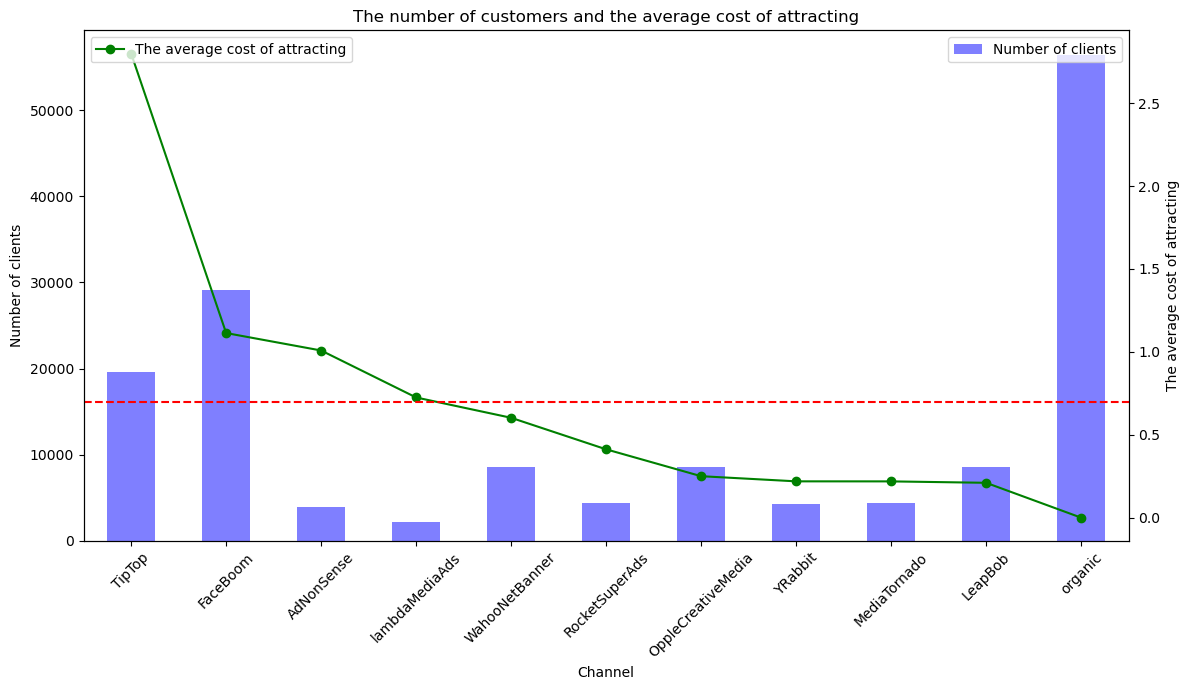

In [154]:
average_acquisition_cost_per_channel = profiles.groupby('channel').agg({'user_id':'count', 'acquisition_cost':'sum'})

average_acquisition_cost_per_channel['average_acq_cost'] = average_acquisition_cost_per_channel['acquisition_cost'] / average_acquisition_cost_per_channel['user_id']
average_acquisition_cost_per_channel.columns = ['user_count','acquisions_cost_total','average_acq_cost']
average_acquisition_cost_per_channel = average_acquisition_cost_per_channel.sort_values(by='average_acq_cost', ascending=False).reset_index()
display(average_acquisition_cost_per_channel)

total_average_CAC = profiles['acquisition_cost'].mean()
print('The average CAC of the entire project:', total_average_CAC)

fig, ax1 = plt.subplots(figsize=(12, 7))

# Building bars for number of customers and average CAC
average_acquisition_cost_per_channel[['user_count']].plot(kind='bar', ax=ax1, width=0.5, color=['blue'], legend=False, alpha=0.5)

# Setting the axes
ax1.set_ylabel('Number of clients')
ax1.set_xlabel('Channel')
ax1.set_xticklabels(average_acquisition_cost_per_channel['channel'], rotation=45)
ax1.set_title('The number of customers and the average cost of attracting')

# Creating the second axis Y for graphics with Ratio
ax2 = ax1.twinx()

ax2.plot(average_acquisition_cost_per_channel['average_acq_cost'], marker='o', color='green')
ax2.axhline(y=0.7, color='red', linestyle='--')
# Setting the second axis Y
ax2.set_ylabel('The average cost of attracting')
ax1.legend(['Number of clients'], loc='upper right')
ax2.legend(['The average cost of attracting'], loc='upper left')

plt.tight_layout()
plt.show()

- The highest average cost of attracting (CAC) is the TipTop - **2.79** channel, and the number of customers is less than the FaceBoom channel, the coorus also has the average cost of attracting much lower - **1.11**
- relatively high average CA (**1.00 and 0.72**) can boast of Adnonsense and Lambdamediaads channels, and there were few clients
- Wahoonetbanner channels, OppleCreativeMedia and Leapbob show low average CAS (less **0.6**) and decent amounts of attracted usels

### Conclusions on the distribution of users by countries, attracting channels, used devices, the effectiveness of investing in advertising on various channels

1. According to the total number of users by a large margin, the United States leads - 100 thousand against 15-18 thousand in other countries.The level of paying users in the United States is also the largest - 6.9% against 4% in other countries, which suggests that ** the US is the most "selling" market for us (we will evaluate the profitability of markets later)
2. France, Germany and the UK show more modest results in the number of users and the share of payers at 4% - **perhaps we should work on an increase in the number of customers there using advertising.**
3. The percentage of organic users in all countries at the level of 36-38%, which indicates the absence of anomalies in attracting users in countries.
4. In advertising channels there are cardinal differences in the USA and other countries: in the USA they give advertising mainly on Tiptop & Faceboom and a couple of other channels, at the same time in other countries Faceboom & Tiptop are not involved at all, other channels are also different from the advancement channelsin USA.**We should consider Faceboom & Tiptop as advertising channels in Europe**
5. According to the devices - the most solvent users of the iPhone & Mac (more than 6%pay), in second place Android (5.85%), but RS users do not really like to spend money (5.05%).**It is worth focusing on advertising to attract users Mac, iPhone, Android (in decreasing order)**.
6. The average percentage of all payers among all users who came from all channels - 5.92%
- Organic, 56 thousand, the share of paying among them is the lowest: 2.06%
- Faceboom, 30 thousand users, the share of payers of them is the highest among all channels - 12.2%
- Tiptop, 20 thousand users.The share of the payers is also high - 9.6%
- The rest of the channels show much more modest results both in the number of attracted users (2-9 thousand) and the percentage of payers (less than 4% of OppleCreativeMedia, LEAPBOB, MEDIATORNADO, YRABIBIT)
- Among the small in the number of attracted customers, Lambdamediaads stand out with a large share of payers - more than 10%.

**As a recommendation, it is worth considering options for increasing the conversion of Organic clients in payers (some profitable options in the appendix for them, etc.), increase investments in advertising on the Lambdamediaads channel, where there are a large share of payers, add advertising on Faceboom & Tiptopin Europe**.

7. Advertising costs and revenue through the channels:
- In the first place in terms of costs and revenue - the TipTop channel, although the ratio is not so impressive - 127%
- Place number 2 in revenue is customers who came themselves.Advertising costs = 0
- third place in revenue - Faceboom, but here is the cost ratio - 79%, i.e.Here we spend more on advertising than we earn.
- The remaining channels, although they show more modest revenue results, have a much higher revenue/cost ratio - 400% and higher.**It is worth considering advertising in the USA on them**.
- In unprofitable and lagging - channel **Adnonsense**.It must be excluded **from the list of channels**, despite the large % payers.Or change the method of advertising payment to reduce costs
- Judging by the monthly dynamics, our advertising costs on Tiptop are growing too quickly.Next, we will study the profitability of these investments

## Assessment of the payback of advertising

### We will analyze the payback of advertising using the LTV and ROI graphs, as well as the speakers of LTV, CAC and ROI.We will leave only paid users in the analysis

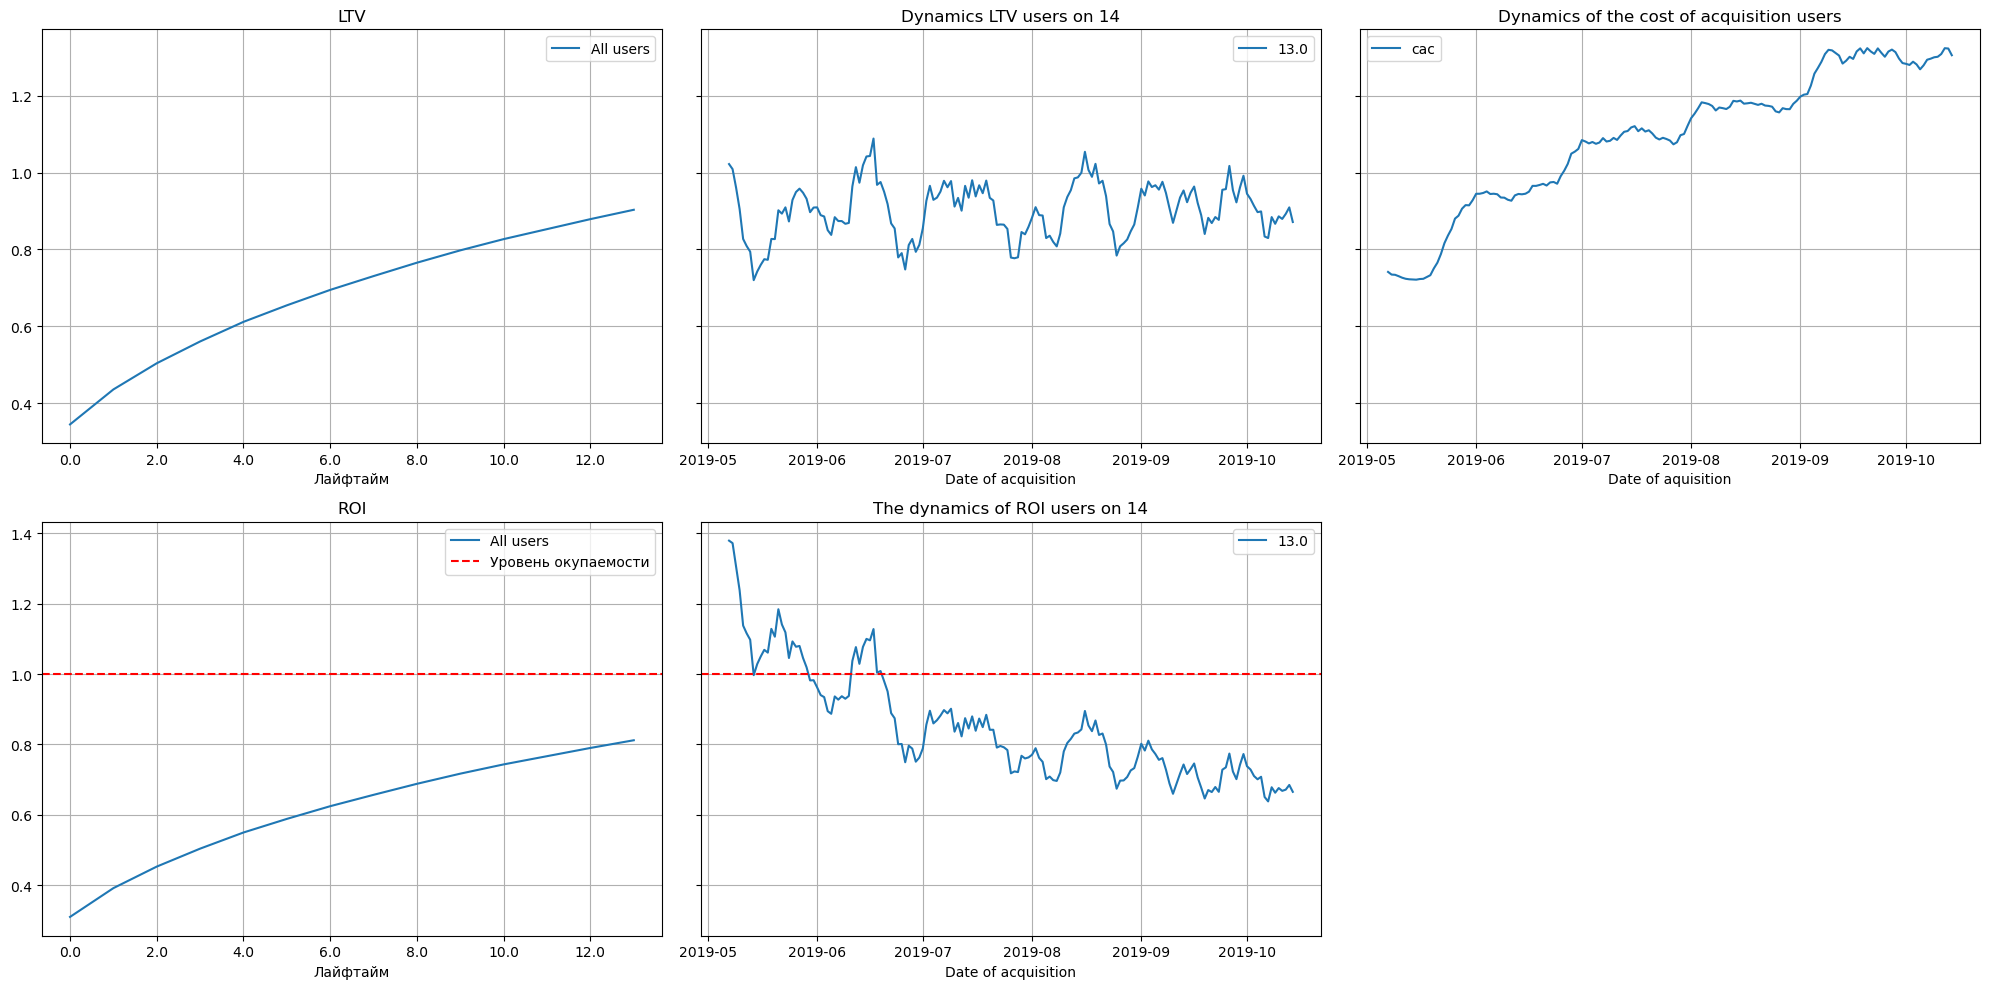

In [155]:
observation_date = dt.datetime(2019, 10, 27).date()  # The moment of analysis is the maximum date in the reports about the attraction - 10/27/19
horizon_days = 14  # Analysis horizon, the task of going on payback in 2 weeks

# Leave in Profiles only data on paid users
profiles_from_ad = profiles.query('channel != "organic"')

# We count LTV and ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_from_ad, orders, observation_date, horizon_days
)

# build graphs
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- Advertising does not pay off.ROI at the end of 14 days - about 80%, i.e.Our profit with the customer advertising attracted by advertising does not even cover the costs.
- in the dynamics of ROI showed positive values ​​at the beginning of the period (May-June), but then went down below the level
- CAC is growing steadily.Obviously, our advertising budget is ineffectively spent.
- LTV for 2 weeks is about 0.8
- The seasonal factor affects LTV, but this indicator is quite stable.So, it's not a worsening of the quality of users.

### Let's look at the performance indicators in countries

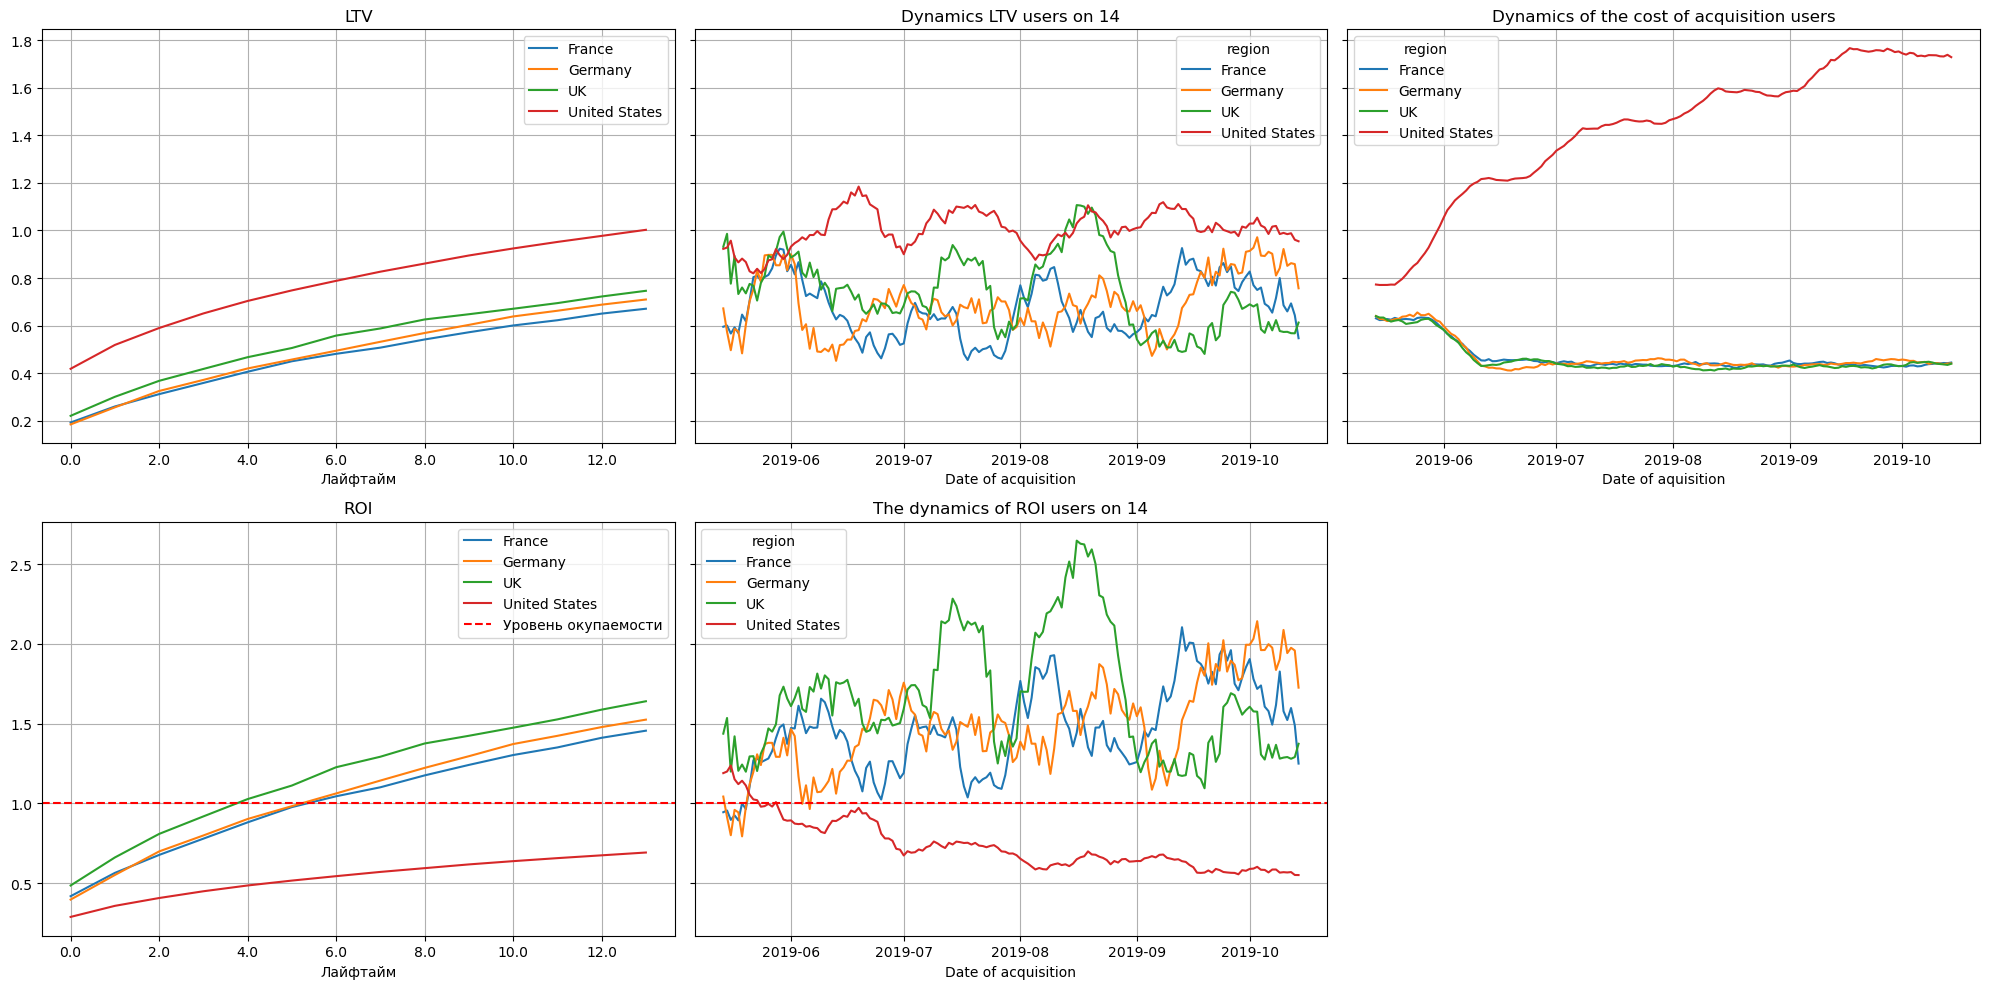

In [156]:
# We see the payback with a breakdown into countries

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV for 2 weeks is about 0.7 for Europe, for the United States above - about 1
- Advertising in the USA does not pay off.ROI at the end of 14 days - about 70%, while in Europe, payback at 150%
- In the dynamics, ROI showed positive values ​​in Europe, and in the USA, starting in June - strives for a level of 50%, i.e.It does not pay off constantly, for all involved users.
- CAC has been growing steadily since June in the United States, and in Europe it has been declining.Obviously, our investments in advertising in the USA are too large
- LTV dynamics is stable for all countries and shows only seasonal fluctuations

### What do the indicators look with a breakdown through the channels of attracting

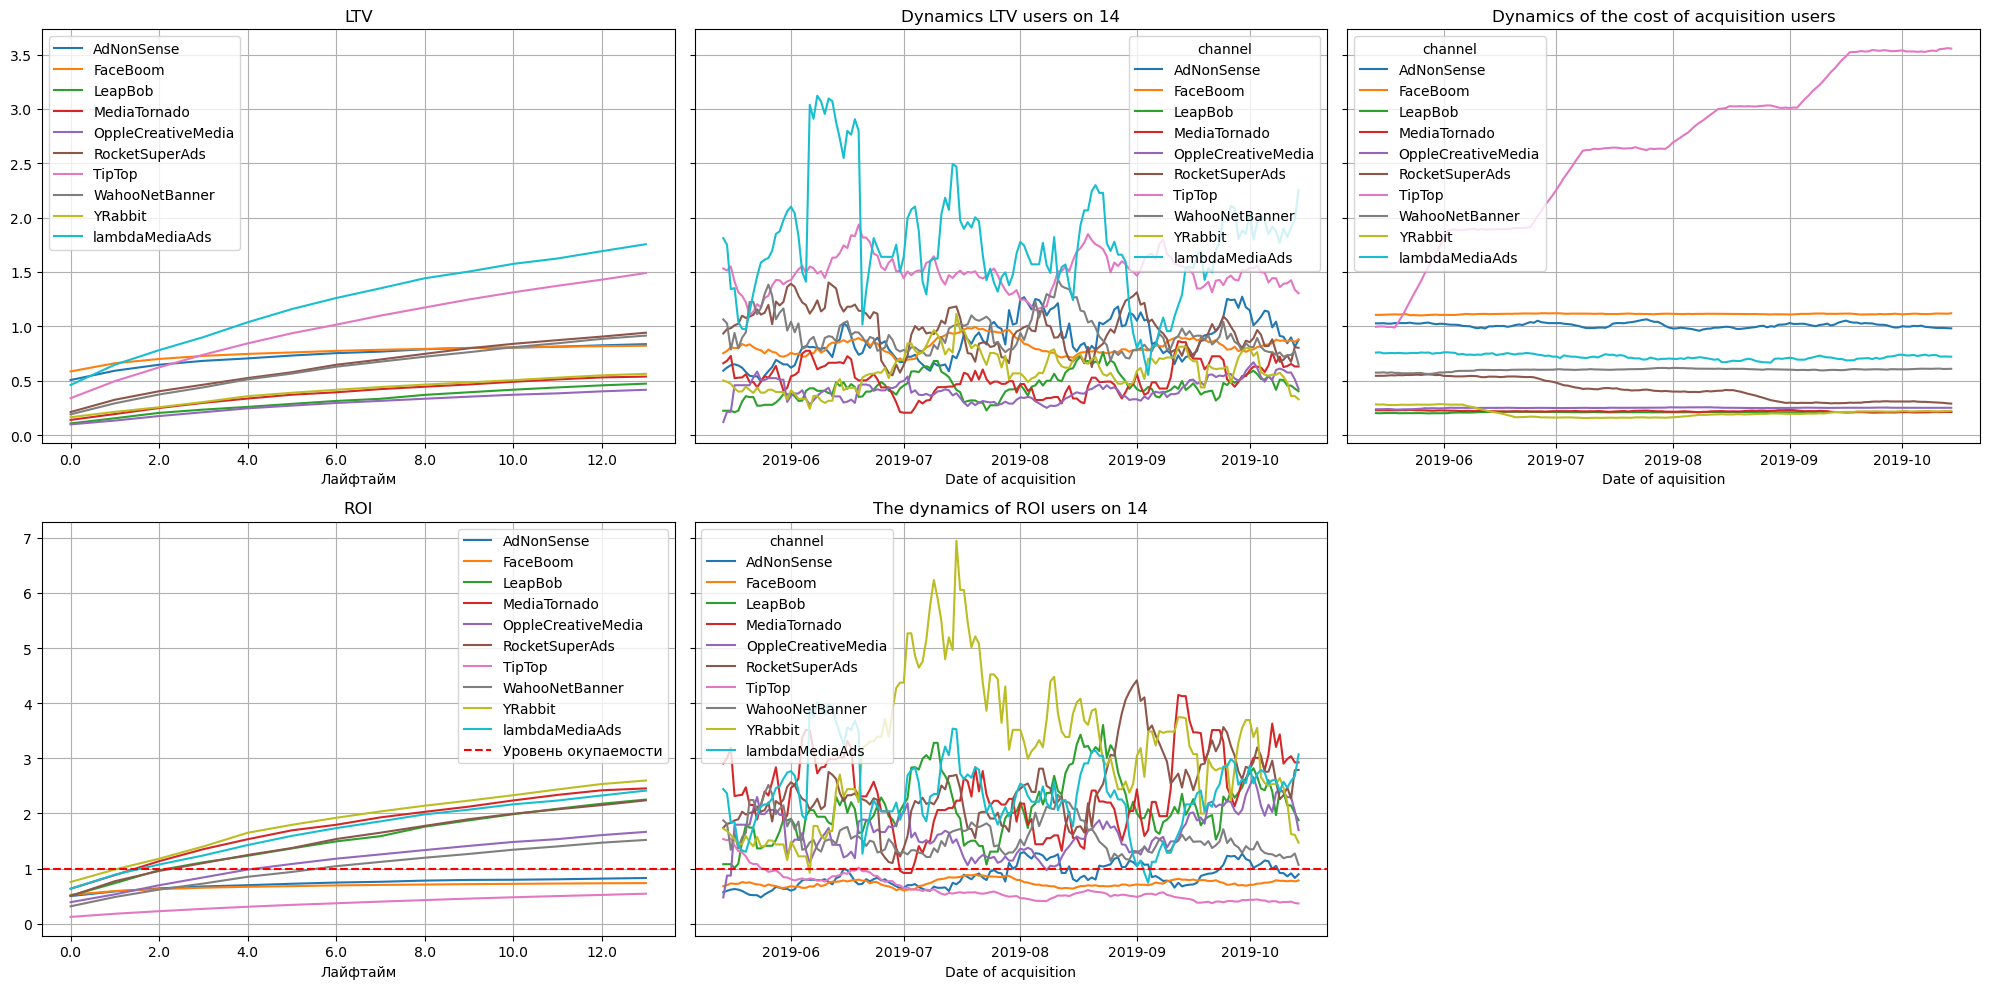

In [157]:
# We see the payback with breakdown by sources of attracting

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV users from Adnonsense & Tiptop channels - about 1.5, LTV of the rest - in the region of 0.5 - 1
- The dynamics of LTV is stable and shows seasonality
- ROI in the main advertising channels in our costs and the number of users - Tiptip & Faceboom - below the payback threshold (at the level of 60-70%. The remaining channels show ROI above 100%
- 3 channels are **below the payback level:**
1. **Tiptop**
2. **Faceboom**
3. **Adnonsense**

- ROI dynamics through the channels: Faceboom since May has been stably at 70-80%, TipTop has sank below 100%since June and reached 50%by the end of October, while the following channels show growth by October:
- Mediatornado (300%)
- Lambdamediaads (200%)
- OppleCreativeMedia (200%)
- CAC dynamics shows the monthly increase in the cost of attracting users from the TipTop channel - from 1.0 in May to 3.5 in October, while the CAC of the remaining channels is stable.Obviously, our investments in advertising on Tiptop do not pay off and continue to grow.

### What do the indicators look like a breakdown by devices

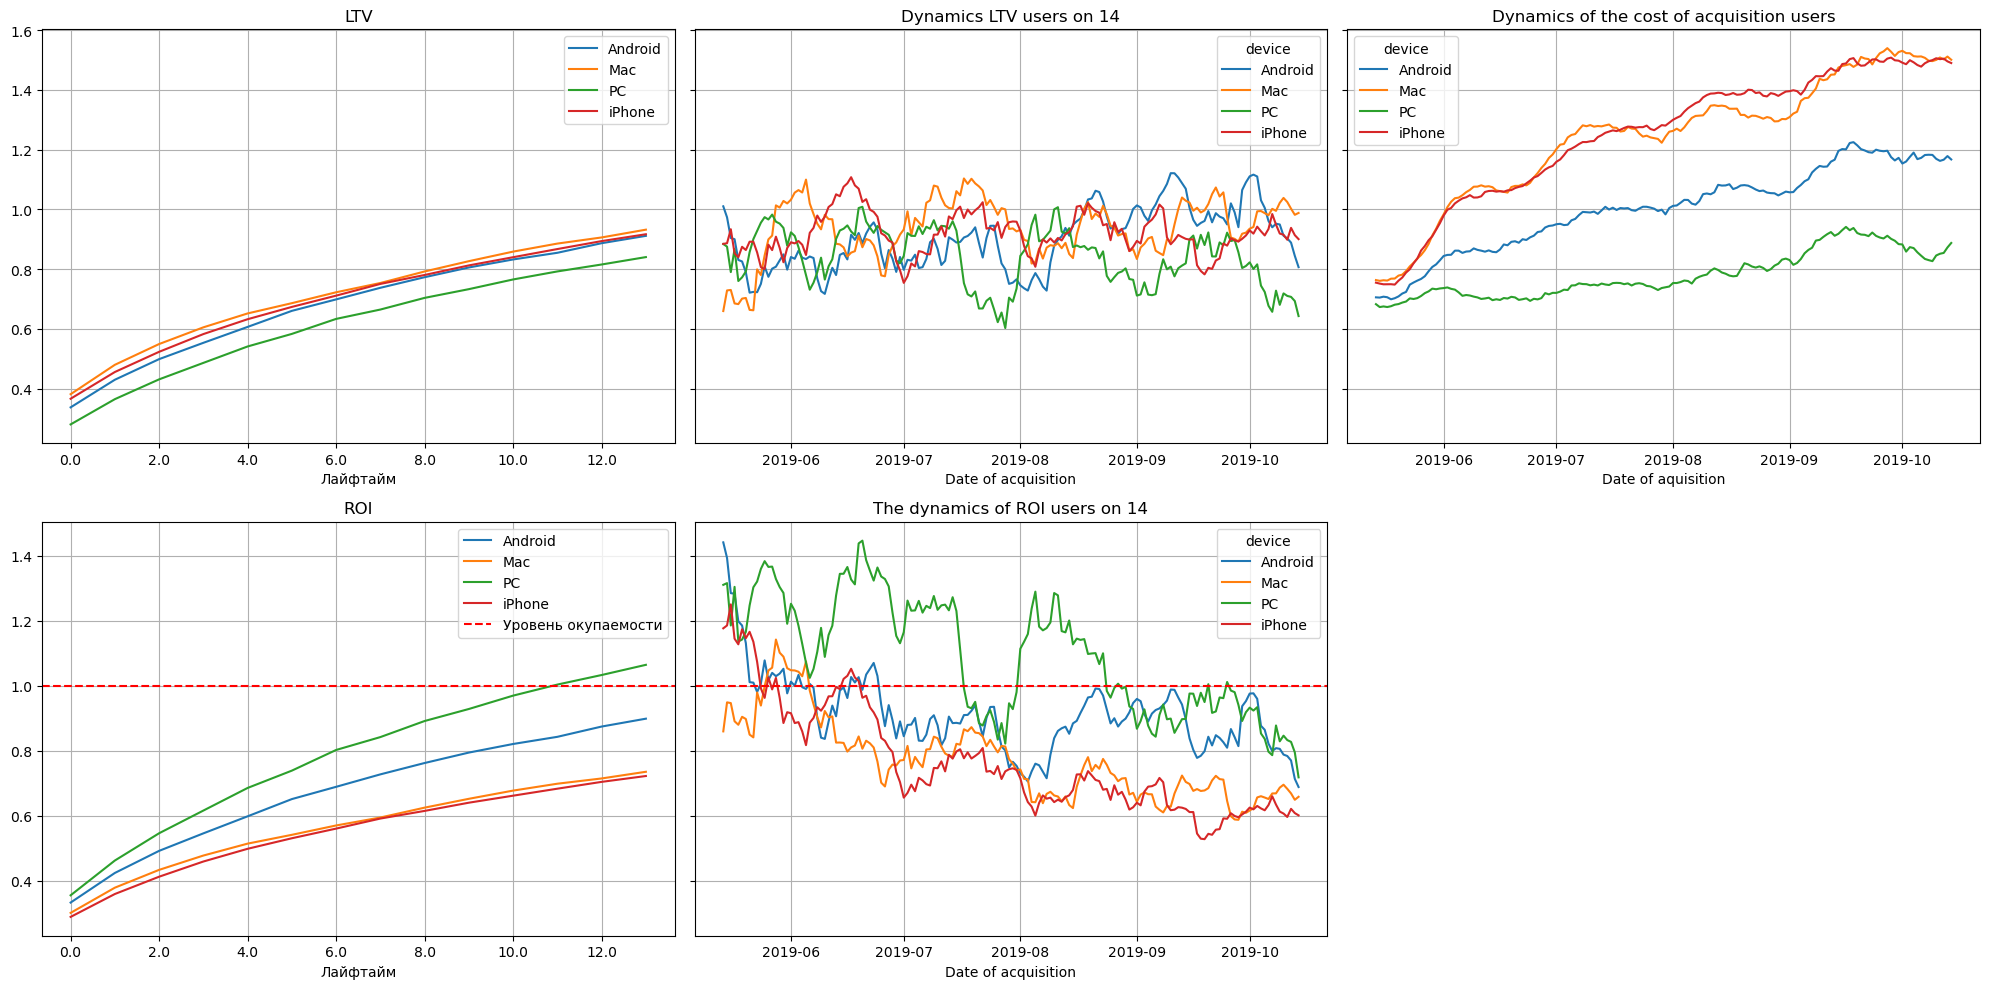

In [158]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV PC users are lower than that of the rest, although the ROI is higher than 100% threshold, and the rest are lower.Apparently, we spend less on attracting PC users
- The dynamics of LTV is stable and shows seasonality
- ROI in the main in the number of users of the devices - iPhone, Mac & Adroid - below the payback threshold (at the level of 70-90%).
- The ROI dynamics in all devices shows a fall - by October it dropped below 80%, while in May it was positive.This suggests that CAC is growing, in relation to all devices
- CAC dynamics shows the monthly increase in the cost of attracting iPhone users, Mac - from 0.8 in May to 1.5 in October, at that time, Adroid - from 0.7 to 1.2, RS - from 0.65 to 0.9

### What does the conversion of users with a breakdown on devices looks like

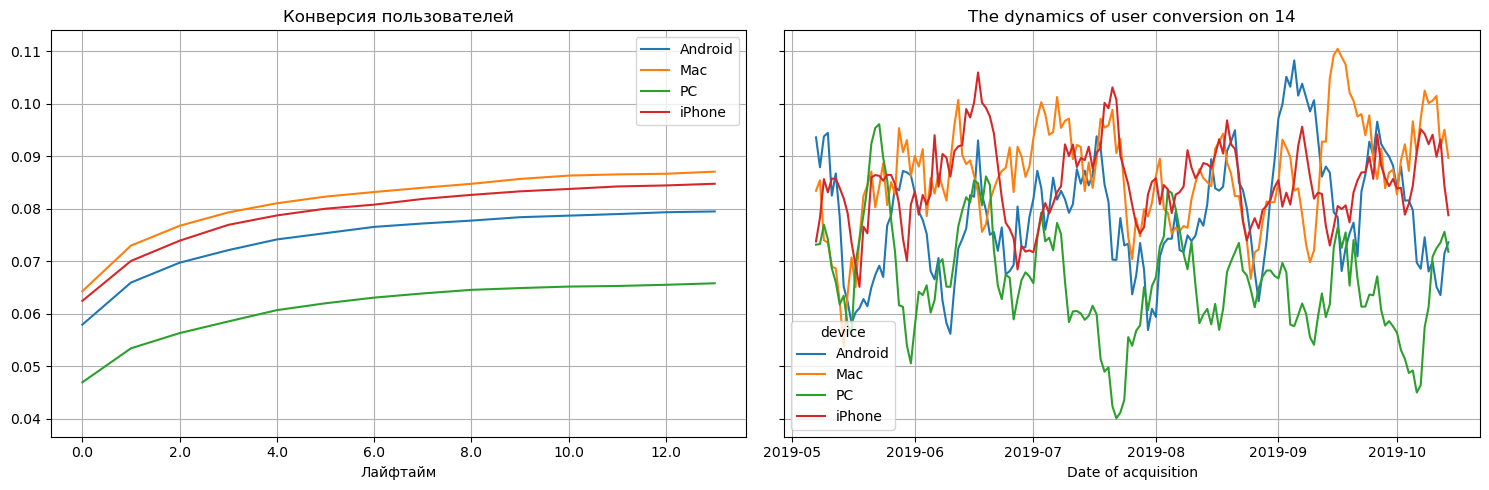

In [159]:
# We see a conversion with a breakdown by devices
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Mac & iPhone user conversion is the largest, PC in lagging
- The dynamics of the conversion is stable and shows seasonality

### What does the conversion with a breakdown look like a country

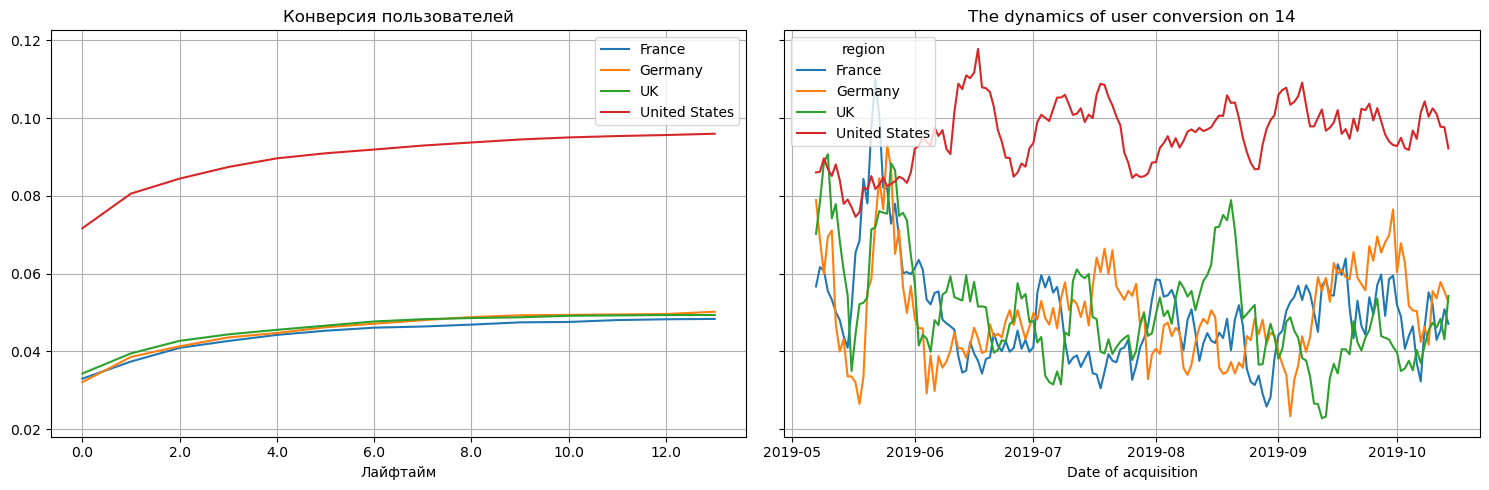

In [160]:
# We watch a conversion with a breakdown into countries
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Users from the USA have conversion 2 times better than from Europe
- In May, there was a moment when the conversion of European users was higher than among users from the United States, but then the United States is leading.

### What does the conversion look like a breakdown through the acquisition channels

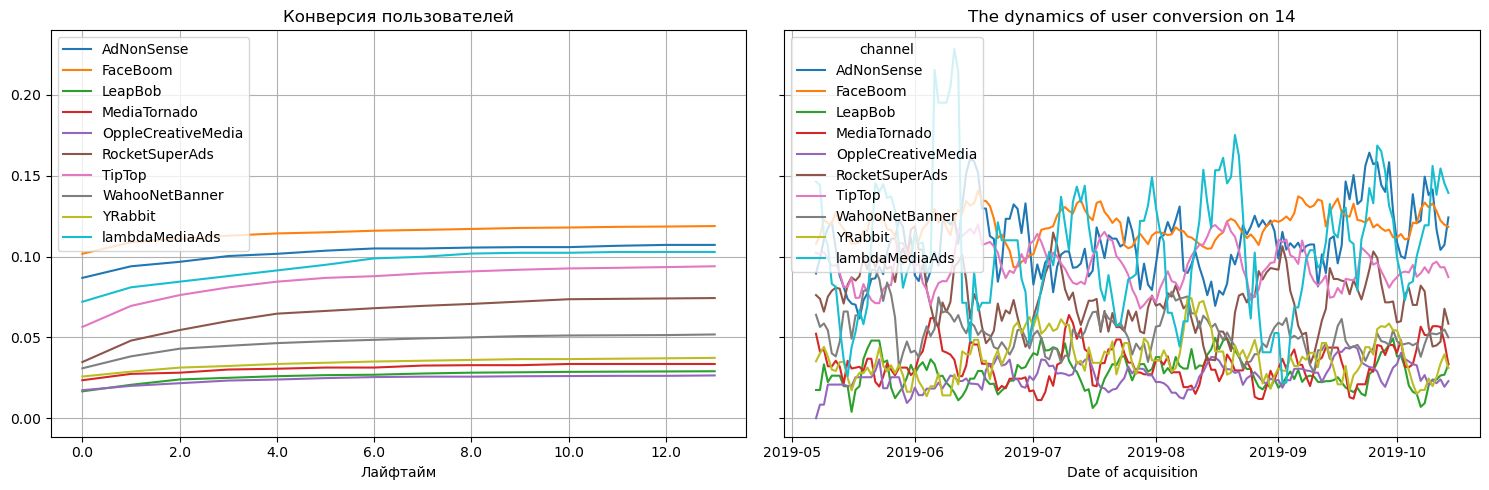

In [161]:
# We watch the conversion with a breakdown through the channels
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_from_ad, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

- Conversion in Faceboom channels, Adnonsse & Lambdamediaart is the best, and TipTop, where we are constantly investing, is only 4th place.

### let's look at the retention with a breakdown into countries

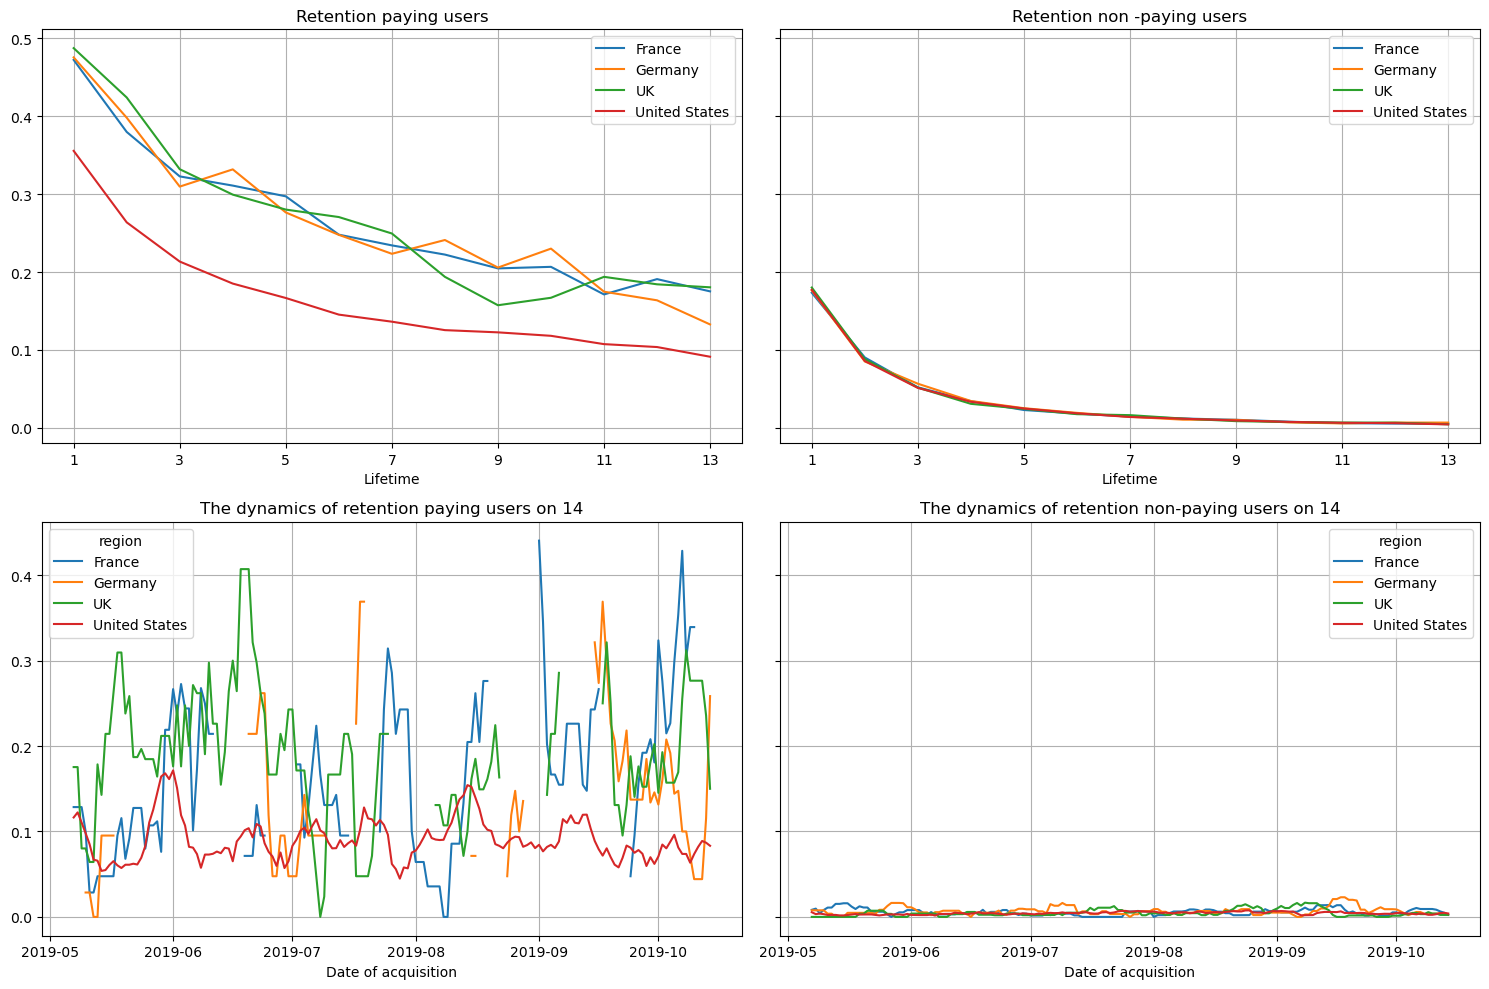

In [162]:
# We watch acquisition with breakdown in by countries
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_from_ad, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- holding paying users on the 14th day in the United States is significantly lower than in Europe that do not pay - equally low
- The dynamics of holding paid users in the United States shows less fluctuations than in Europe.Stably lower than in Europe, but more stable.


### let's look at the retention with a breakdown through the channels

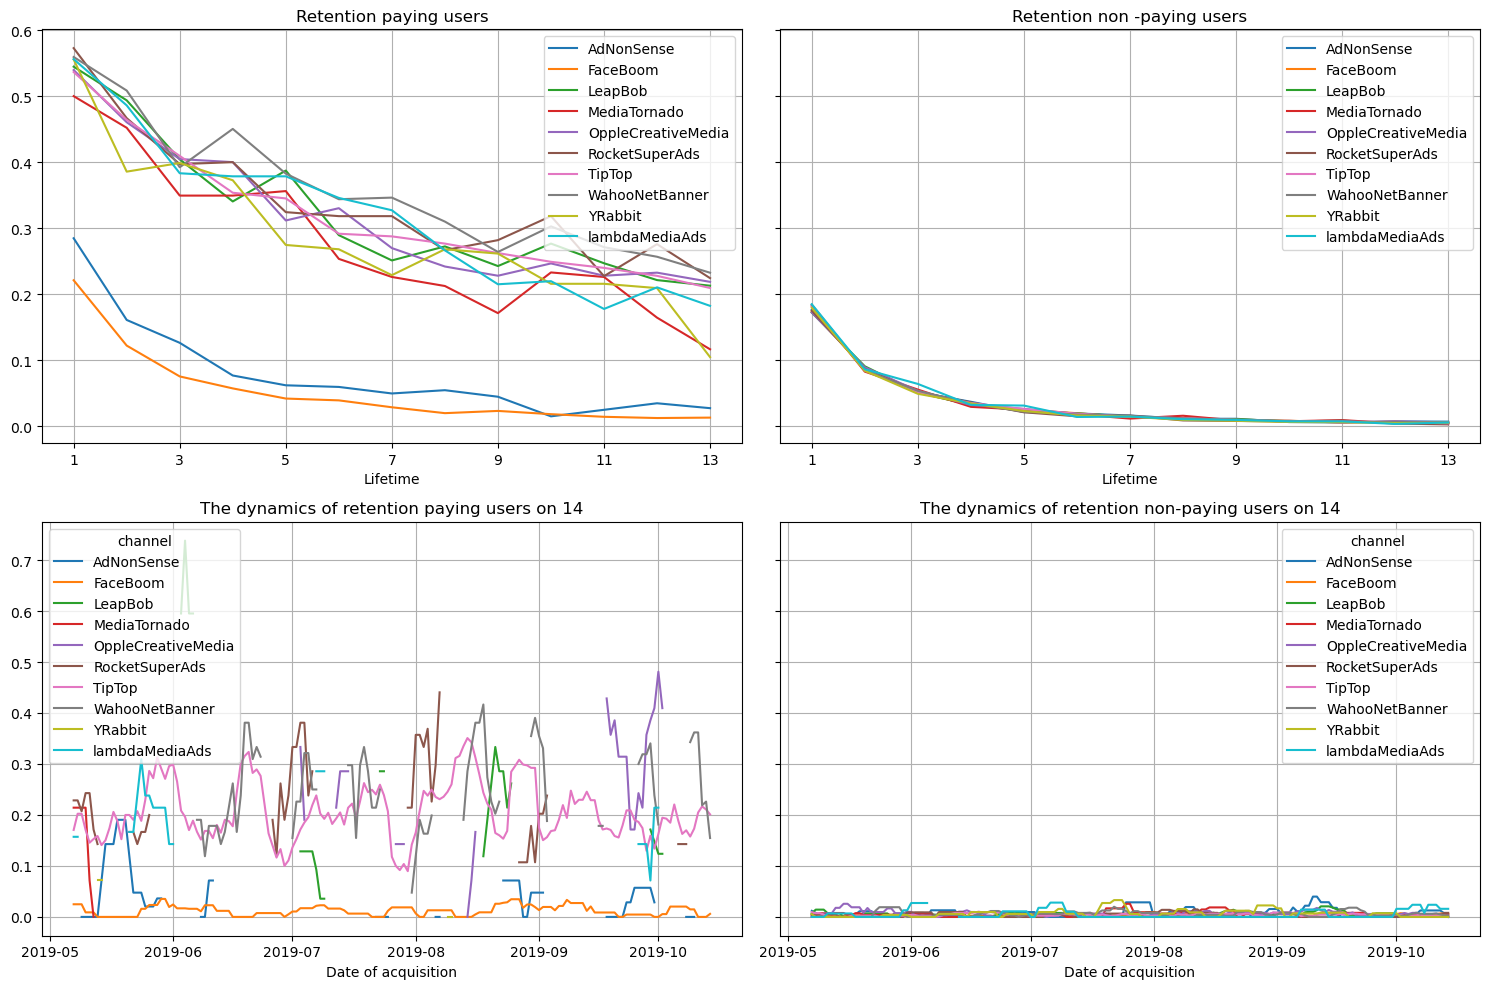

In [163]:
# We see holding with a breakdown through the channels
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_from_ad, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- In the channels of attracting, obvious outsiders are - Faceboom & Adnonsense. Despite the fact that the conversion of these channels is the highest.

### let's look at the retention with a breakdown by devices

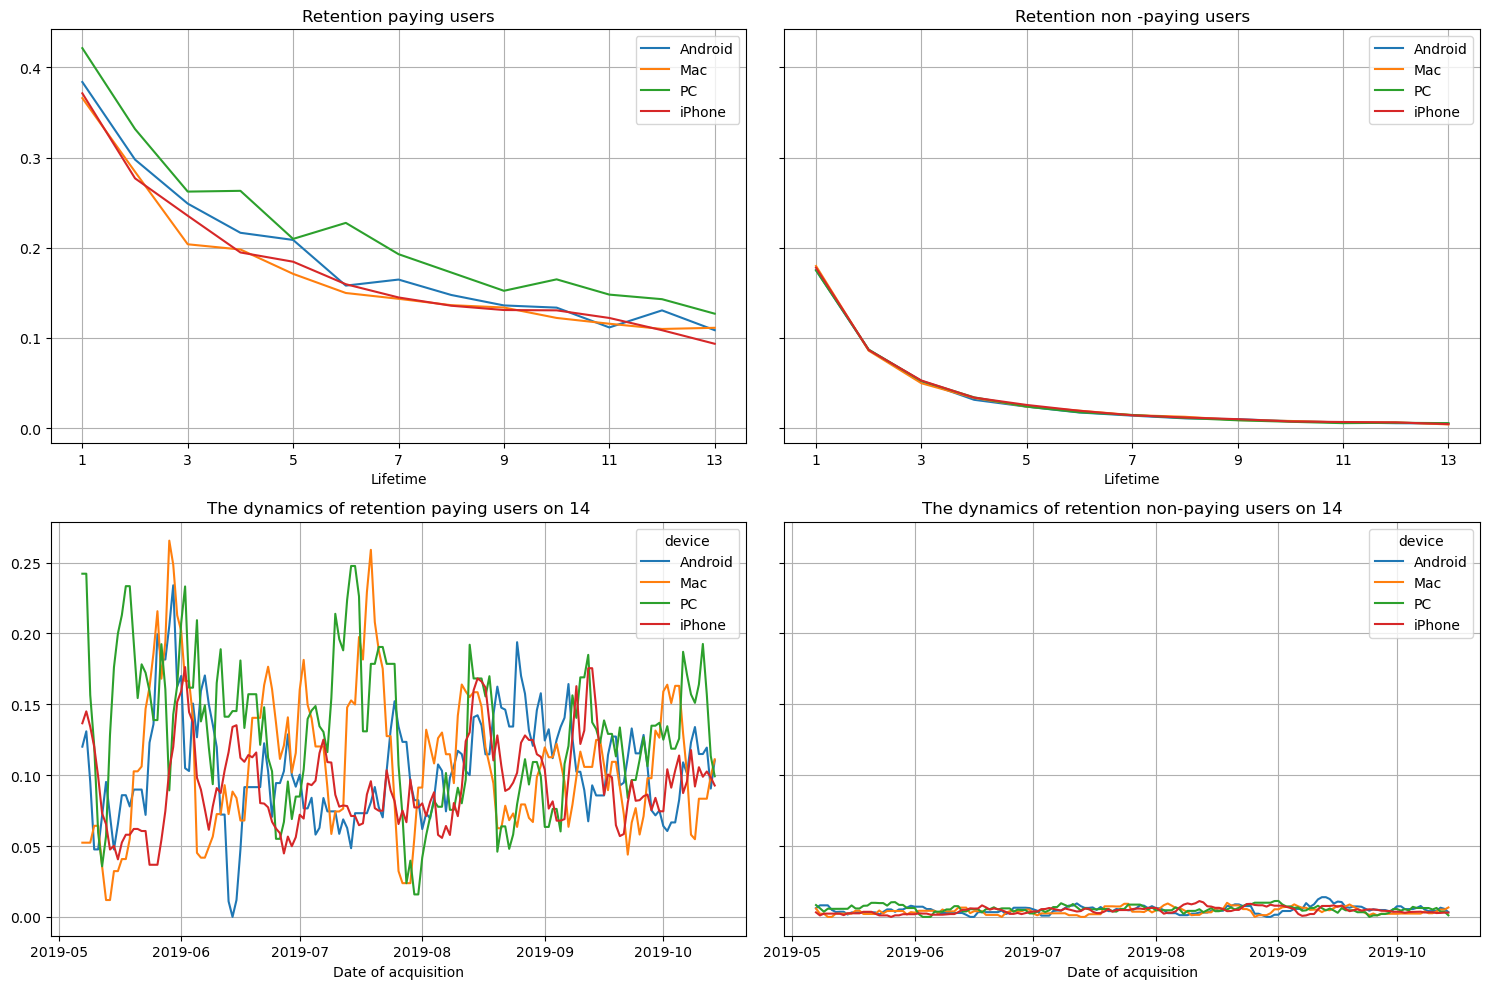

In [164]:
# We see holding with a breakdown by devices
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_from_ad, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

- There are no anomalies in the devices retention rates


# Conclusions

During the process of analyzing the effectiveness of the advertising investments of Procrastinate Pro+, we carried out EDA of the received data, corercted names of the columns and data types, calculated the quantity and share of paying users, compiled their profiles, calculated user metrics and built the LTV, CAC, ROI.

***below our conclusions:***

# Causes of inefficiency of advertising investments

## Low conversion (CR):
- according to the results obtained from analysis, the conversion of PC & Android users in Europe is 2 times lower than in the USA
- the conversion curve for 14 days is too slope - the conversion reaches 10% after 7 days and no longer grows, and then users leave the application, according to the deduction schedules

## Low retention (RR):
- the retention of paid users is already lower than 60% right from the second day and continue falling to 10% - perhaps something wrong with the application functions, users do not interact with it actively enough
- It is also clear from the graphs that the retention of users in the United States who came from Faceboom & Adnonsense is low.

## metrics LTV, ROI, CAC:
- The cost of attracting iPhone & Mac users is growing faster than Android and PC
- Only PC users have ROI more than 100% after 14 days, the rest are below the payback threshold
- CAC growth from the Tiptop channel - skyrocketed from 1.0 in May to 3.5 in October, while the CAC of the remaining channels is stable. Obviously, our investments in Tiptop ads do not pay off and continue to grow
- Key channels by the number of users - Faceboom & Tiptop - below the ROI payroll (60-70%) threshold
- Our investments in attracting users from the United States are constantly growing and ROI reaches only 50% on 14th day, while in Europe we have ROI = 100% already on the 6th day and then it reaches 150% by 14th
- LTV in the United States is higher than in Europe, but not enough to cover the CAC


# Recommendations for the marketing department

## improvement of conversion
- We should activate advertising in Europe, possibly not enough brand visibility now (because it is not advertised on Faceboom & Tiptop), or there are not enough functions specific to the European market, or there are difficulties with payments in Europe. 
- It is necessary to improve the motivation of the user to make a purchase in the first 14 days, for example, a special offer limited in time, newsletter etc.

## Improvement of retention
- informing the client about products, discounts, bonuses and loyalty programs, emphasis on users from the United States from the Faceboom channel
- Feedback for consumers.
- maintaining user involvement

## Changing the advertising strategy
- Use Faceboom & Tiptop in Europe to attract new customers and increase the recognition of the application
- The main payers are iPhone & MAC users. Using advertising, it is necessary to increase the conversion of Android & PC also.
- We need to change advertising in the United States - the money that we invest in advertising on Tiptop should be addressed to the channels with good conversion and retention:
1. **Rocketsuprads**
2. **OpplecreativeMedia**
3. **lambdamedaads**